# Machine Learning Project - Consumer Complaints

## The data

The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily. [Learn more](https://www.consumerfinance.gov/data-research/consumer-complaints/)

Source: [https://cfpb.github.io/api/ccdb/index.html](https://cfpb.github.io/api/ccdb/index.html)

The dataset is too large to be pushed to a GitHub repo because of a strict file limit (100MB) which this file exceeds. For that reason the dataset file will be split into multiple files with the following code.

In [3]:
import pandas as pd
rows = pd.read_csv('data/complaints-2020-01-22_08_24.csv', chunksize=50000)

for i, chunk in enumerate(rows):
    chunk.to_csv('data/complaints-2020-01-22_08_24/filepart_{}.csv'.format(i))

The dataset is split up into multiple smaller files each still starting with the heading of the original file. The following code will read and concatenate all files into a pandas dataframe.

In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

csv_files = 'data/complaints-2020-01-22_08_24/*.csv'
dataset = pd.concat([pd.read_csv(f, header=0, delim_whitespace=False) for f in glob.glob(csv_files)], ignore_index = True)
dataset.head()

Unnamed: 0 Date received  \
0      150000      02/07/18   
1      150001      08/10/17   
2      150002      04/26/18   
3      150003      10/23/15   
4      150004      03/29/16   

                                             Product  \
0  Credit reporting, credit repair services, or o...   
1                                    Debt collection   
2                                    Debt collection   
3                                    Debt collection   
4                                    Debt collection   

                             Sub-product  \
0                       Credit reporting   
1                       Payday loan debt   
2                       Credit card debt   
3  Other (i.e. phone, health club, etc.)   
4  Other (i.e. phone, health club, etc.)   

                                               Issue  \
0  Problem with a credit reporting company's inve...   
1  Threatened to contact someone or share informa...   
2                    Written notification about debt   
3              Cont'd attempts collect debt not owed   
4              Cont'd attempts collect debt not owed   

                                           Sub-issue  \
0  Their investigation did not fix an error on yo...   
1            Talked to a third-party about your debt   
2   Didn't receive enough information to verify debt   
3                                   Debt is not mine   
4                                   Debt is not mine   

                        Consumer complaint narrative  \
0  The Credit bureaus are reporting inaccurate in...   
1  I had an online payday loan from XXXX XXXX for...   
2  XXXX 's has violated 15 USC 1692 by continuing...   
3  I keep getting collection calls from Central C...   
4  I joined XXXX of XXXX ( club # XXXX ) on XXXX/...   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1                                               None   
2  Company has responded to the consumer and the ...   
3   Company chooses not to provide a public response   
4  Company believes it acted appropriately as aut...   

                               Company State ZIP code           Tags  \
0  Experian Information Solutions Inc.    NY     None           None   
1       Ad Astra Recovery Services Inc    MS     None           None   
2                  SYNCHRONY FINANCIAL    MN     None           None   
3          Radius Global Solutions LLC    FL    333XX  Servicemember   
4                       Omega RMS, LLC    NY     None           None   

  Consumer consent provided? Submitted via Date sent to company  \
0           Consent provided           Web             02/07/18   
1           Consent provided           Web             08/10/17   
2           Consent provided           Web             04/26/18   
3           Consent provided           Web             10/29/15   
4           Consent provided           Web             03/31/16   

  Company response to consumer Timely response? Consumer disputed?  \
0      Closed with explanation              Yes                NaN   
1      Closed with explanation              Yes                NaN   
2      Closed with explanation              Yes                NaN   
3      Closed with explanation              Yes                Yes   
4      Closed with explanation              Yes                 No   

   Complaint ID  
0       2805603  
1       2600384  
2       2888285  
3       1622575  
4       1855337

### Description

The description of the fields in the dataset:

| Field name | Description | Data type | Notes |
|:---|:---|:---|:---|
| Date received | The date the CFPB received the complaint | date & time |  |
| Product | The type of product the consumer identified in the complaint | plain text | This field is a categorical variable. |
| Sub-product | The type of sub-product the consumer identified in the complaint | plain text | This field is a categorical variable. Not all Products have Sub-products. |
| Issue | The issue the consumer identified in the complaint | plain text | This field is a categorical variable. Possible values are dependent on Product. |
| Sub-issue | The sub-issue the consumer identified in the complaint | plain text | This field is a categorical variable.  Possible values are dependent on product and issue.  Not all Issues have corresponding Sub-issues. |
| Consumer complaint narrative | Consumer complaint narrative is the consumer-submitted description of "what happened" from the complaint. Consumers must opt-in to share their narrative. We will not publish the narrative unless the consumer consents, and consumers can opt-out at any time. The CFPB takes reasonable steps to scrub personal information from each complaint that could be used to identify the consumer. | plain text | Consumers' descriptions of what happened are included if consumers consent to publishing the description and after we take steps to remove personal information. |
| Company public response | The company's optional, public-facing response to a consumer's complaint. Companies can choose to select a response from a pre-set list of options that will be posted on the public database. For example, "Company believes complaint is the result of an isolated error." | plain text | Companies' public-facing responses to complaints are included if companies choose to publish one. Companies may select a public response from a set list of options as soon as they respond to the complaint, but no later than 180 days after the complaint was sent to the company for response. |
| Company | The complaint is about this company | plain text | This field is a categorical variable. |
| State | The state of the mailing address provided by the consumer | plain text | This field is a categorical variable. |
| ZIP code | The mailing ZIP code provided by the consumer | plain text | Mailing ZIP code provided by the consumer. This field may: i) include the first five digits of a ZIP code; ii) include the first three digits of a ZIP code (if the consumer consented to publication of their complaint narrative); or iii) be blank (if ZIP codes have been submitted with non-numeric values, if there are less than 20,000 people in a given ZIP code, or if the complaint has an address outside of the United States). |
| Tags | Data that supports easier searching and sorting of complaints submitted by or on behalf of consumers.  For example, complaints where the submitter reports the age of the consumer as 62 years or older are tagged, ‘Older American.’ Complaints submitted by or on behalf of a servicemember or the spouse or dependent of a servicemember are tagged, ‘Servicemember.’ Servicemember includes anyone who is active duty, National Guard, or Reservist, as well as anyone who previously served and is a Veteran or retiree. | plain text |  |
| Consumer consent provided? | Identifies whether the consumer opted in to publish their complaint narrative. We do not publish the narrative unless the consumer consents and consumers can opt-out at any time. | plain text | This field shows whether a consumer provided consent to publish their complaint narrative, as listed below:<br/><br/>**Consent provided:**<br/>Consumer opted in to share their complaint narrative.<br/><br/>Data populates in this field 60 days after the complaint was sent to the company for response or after the company provides an optional company public response – whichever comes first, and after steps have been taken to scrub personal information from the complaint narrative.<br/><br/>**Consent not provided:**<br/>Consumer did not opt-in to publish their complaint narrative. Data populates in this field 60 days after the complaint was sent to the company for response or after the company provides an optional company public response – whichever comes first.<br/><br/>**Consent withdrawn:**<br/>Consumer opted in to publish their complaint narrative and later withdrew their consent.<br/><br/>**N/A:** Consumers did not have the option to publish their consumer complaint narrative or the complaint was received before March 19, 2015. Data populates in this field immediately.<br/><br/>**Other:** Complaint does not meet criteria for narrative publication.<br/><br/>Blanks appear until at least 60 days after the complaint is sent to the company for response or until the company provides an optional company public response – whichever comes first. |
| Submitted via | How the complaint was submitted to the CFPB | plain text | This field is a categorical variable. |
| Date sent to company | The date the CFPB sent the complaint to the company | date & time |  |
| Company response to consumer | This is how the company responded. For example, "Closed with explanation." | plain text | This field is a categorical variable. |
| Timely response? | Whether the company gave a timely response | plain text | yes/no |
| Consumer disputed? | Whether the consumer disputed the company’s response | plain text | **Yes**<br/>**No**<br/>**N/A:** The Bureau discontinued the consumer dispute option on April 24, 2017. |
| Complaint ID | The unique identification number for a complaint | number |  |

## Exploratory Data Analysis (EDA)

The dataset consists of complaints which have been labeled by a couple of columns. The columns that can be considered labels are the following; Product, Sub-product, Issue, Sub-Issue and Tags. The table below displays the different products with the number of complaints that have been registered for that product. Certain products have more complaints than others. When only considering the product column in terms of data cleanliness one can see that some products overlap. An example of this are the products "Credit card or prepaid card", "Credit card", "Prepaid card". This should be taken into consideration when doing further analysis.

In [5]:
dataset['Product'].value_counts().to_frame()

Product
Credit reporting, credit repair services, or ot...   141742
Debt collection                                      105765
Mortgage                                              61094
Credit reporting                                      31588
Credit card or prepaid card                           31482
Student loan                                          24930
Credit card                                           18838
Checking or savings account                           18784
Bank account or service                               14885
Consumer Loan                                          9473
Vehicle loan or lease                                  8079
Money transfer, virtual currency, or money service     7735
Payday loan, title loan, or personal loan              6305
Payday loan                                            1746
Money transfers                                        1497
Prepaid card                                           1450
Other financial service                                 292
Virtual currency                                         16

The following bar plot shows the distribution of products.

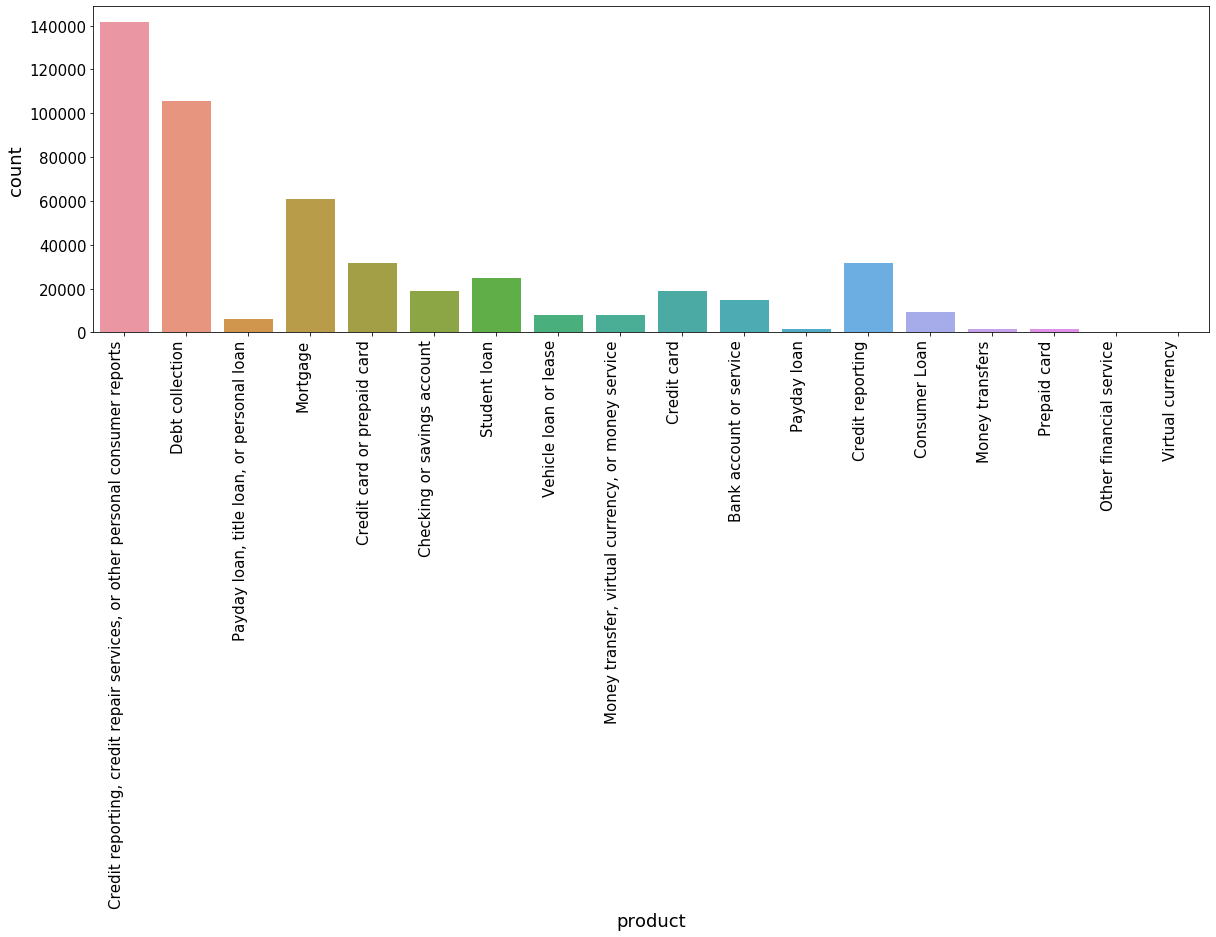

In [6]:
plt.figure(figsize=(20,6))
chart = sns.countplot(x='Product', data=dataset)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.tick_params(labelsize=15)
plt.xlabel('product', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.show()

As seen above, the dataset is not balanced. This means that in the worst case, the less frequent classes are treated as outliers and would be ignored. We can solve this by **undersampling or oversampling** each class.
However, this is not always in our best interest to solve the imbalance this way. Sometimes it is desirable to have a classifier that gives high prediction accuracy over the majority classes while maintaining reasonable accuracy for the minority classes.
For this reason, the dataset will not be undersampled or oversampled and will be left as is. We will solve this problem by stratifying the classes when splitting the data. This means that both the training and test sets will have the same distribution.

As a hypothesis, we can say that products that have a higher occurrence will probably have a more accurate prediction when testing.

The following table consists of the number of complaints per product and their sub-products. A fact about these labels is that sub-products aren't unique for products.

In [7]:
product_cat = dataset.groupby(['Product','Sub-product']).size().to_frame()
pd.set_option('display.max_rows', len(product_cat))
product_cat

0
Product                                            Sub-product                                       
Bank account or service                            (CD) Certificate of deposit                    274
                                                   Cashing a check without an account             134
                                                   Checking account                             10113
                                                   Other bank product/service                    3477
                                                   Savings account                                887
Checking or savings account                        CD (Certificate of Deposit)                    338
                                                   Checking account                             15632
                                                   Other banking product or service              1483
                                                   Personal line of credit                         14
                                                   Savings account                               1317
Consumer Loan                                      Installment loan                              3093
                                                   Pawn loan                                       34
                                                   Personal line of credit                         44
                                                   Title loan                                     199
                                                   Vehicle lease                                  962
                                                   Vehicle loan                                  5141
Credit card                                        None                                         18838
Credit card or prepaid card                        General-purpose credit card or charge card   23961
                                                   General-purpose prepaid card                  1270
                                                   Gift card                                      144
                                                   Government benefit card                        335
                                                   Payroll card                                   131
                                                   Store credit card                             5638
                                                   Student prepaid card                             3
Credit reporting                                   None                                         31588
Credit reporting, credit repair services, or ot... Conventional home mortgage                       1
                                                   Credit repair services                         726
                                                   Credit reporting                            138534
                                                   Other personal consumer report                2481
Debt collection                                    Auto                                          1064
                                                   Auto debt                                     2319
                                                   Credit card                                   7520
                                                   Credit card debt                             14522
                                                   Federal student loan                           549
                                                   Federal student loan debt                     1126
                                                   I do not know                                20639
                                                   Medical                                       6990
                                                   Medical debt                                 11239
                    

Next to product and sub-product as labels, there are also these columns for issues and sub-issues. The two tables below show that a lot of issues exist and that a lot of the sub-issues are labeled "None". The issues are also imbalanced in the same way as with the products explained above.

In [8]:
pd.set_option('display.max_rows', len(dataset))
dataset['Issue'].value_counts().to_frame()

Issue
Incorrect information on your report                77776
Problem with a credit reporting company's inves...  38424
Attempts to collect debt not owed                   28629
Incorrect information on credit report              21217
Improper use of your report                         20239
Cont'd attempts collect debt not owed               17434
Loan servicing, payments, escrow account            14722
Communication tactics                               13711
Trouble during payment process                      13280
Written notification about debt                     12365
Loan modification,collection,foreclosure            10789
False statements or representation                  10522
Managing an account                                 10200
Dealing with your lender or servicer                 9154
Struggling to pay mortgage                           8386
Dealing with my lender or servicer                   7909
Took or threatened to take negative or legal ac...   7669
Disclosure verification of debt                      7590
Managing the loan or lease                           7521
Problem with a purchase shown on your statement      6977
Account opening, closing, or management              6347
Credit reporting company's investigation             5663
Other features, terms, or problems                   4412
Fees or interest                                     4198
Problem when making payments                         3942
Application, originator, mortgage broker             3746
Fraud or scam                                        3561
Struggling to repay your loan                        3516
Deposits and withdrawals                             3425
Problem with fraud alerts or security freezes        3210
Unable to get your credit report or credit score     3113
Billing disputes                                     3102
Can't repay my loan                                  3057
Applying for a mortgage or refinancing an exist...   3004
Taking/threatening an illegal action                 2933
Improper contact or sharing of info                  2911
Closing on a mortgage                                2640
Getting a credit card                                2600
Struggling to pay your loan                          2597
Closing your account                                 2460
Problems when you are unable to pay                  2456
Advertising and marketing, including promotiona...   2399
Closing an account                                   2379
Unable to get credit report/credit score             2252
Settlement process and costs                         2250
Credit monitoring or identity theft protection ...   2223
Opening an account                                   2208
Problem with a lender or other company charging...   2144
Problems caused by my funds being low                2084
Threatened to contact someone or share informat...   2001
Other                                                1940
Charged fees or interest you didn't expect           1770
Problem caused by your funds being low               1724
Identity theft / Fraud / Embezzlement                1723
Money was not available when promised                1621
Using a debit or ATM card                            1597
Taking out the loan or lease                         1560
Improper use of my credit report                     1520
Problems at the end of the loan or lease             1519
Other transaction problem                            1482
Closing/Cancelling account                           1440
Making/receiving payments, sending money             1432
Trouble using your card                              1307
Credit decision / Underwriting                       1289
Customer service / Customer relations                 973
Getting a loan or lease                               943
Credit monitoring or identity protection              936
Rewards                                               900
Charged fees or interest I didn't expect          

The following table consists of the number of complaints per issues and their sub-issues. A fact about these labels is that sub-issues aren't unique for issues. A lot of the sub-issues are catgorized as none, so this makes predicting these labels a lot more complex and irrelevant.

In [9]:
issue_cat = dataset.groupby(['Issue','Sub-issue']).size().to_frame()
pd.set_option('display.max_rows', len(issue_cat))
issue_cat

0
Issue                                              Sub-issue                                                
APR or interest rate                               None                                                  785
Account opening, closing, or management            None                                                 6347
Account terms and changes                          None                                                   17
Adding money                                       None                                                   92
Advertising                                        Changes in terms from what was offered or adver...     18
                                                   Confusing or misleading advertising about the card     59
Advertising and marketing                          None                                                  830
Advertising and marketing, including promotiona... Confusing or misleading advertising about the c...    947
                                                   Didn't receive advertised or promotional terms       1452
Advertising, marketing or disclosures              None                                                   25
Application processing delay                       None                                                  107
Application, originator, mortgage broker           None                                                 3746
Applied for loan/did not receive money             None                                                   85
Applying for a mortgage                            None                                                  190
Applying for a mortgage or refinancing an exist... None                                                 3004
Arbitration                                        None                                                   83
Attempts to collect debt not owed                  Debt is not yours                                   14708
                                                   Debt was already discharged in bankruptcy and i...   1491
                                                   Debt was paid                                        6413
                                                   Debt was result of identity theft                    6017
Balance transfer                                   None                                                  298
Balance transfer fee                               None                                                   51
Bankruptcy                                         None                                                   96
Billing disputes                                   None                                                 3102
Billing statement                                  None                                                  620
Can't contact lender                               None                                                  372
Can't contact lender or servicer                   None                                                  172
Can't repay my loan                                Can't decrease my monthly payments                   1557
                                                   Can't get flexible payment options                    999
                                                   Can't temporarily postpone payments                   501
Can't stop charges to bank account                 None                                                  166
Can't stop withdrawals from your bank account      None                                                  148
Cash advance                                       None                                                   44
Cash advance fee                                   None                                                   41
Charged bank acct wrong day or amt                 None                                                  106
Charged fees or interest I didn't expect           None                   

The column "Tag" could be considered as a label. The table below shows all unique values for this column and it appears that there are only 4. For this reason, it is not a good feature to use for a model for predictions.

In [10]:
pd.set_option('display.max_rows', len(dataset))
dataset['Tags'].value_counts().to_frame()

Tags
None                           402436
Servicemember                   49801
Older American                  26802
Older American, Servicemember    6662

The heatmap below shows the correlation between all columns. To be able to generate a correlation heatmap, we first have to factorize all columns so that categorical data is numerical. When looking at the heatmap we can conclude that not all columns have correlations and not all will be of any meaning for classification. Some of the columns aren't meant to be factorized to be put in a correlation matrix, but it's easier to use this one factorize lambda function on the whole dataset and then only look at what has a logical meaning in the matrix.

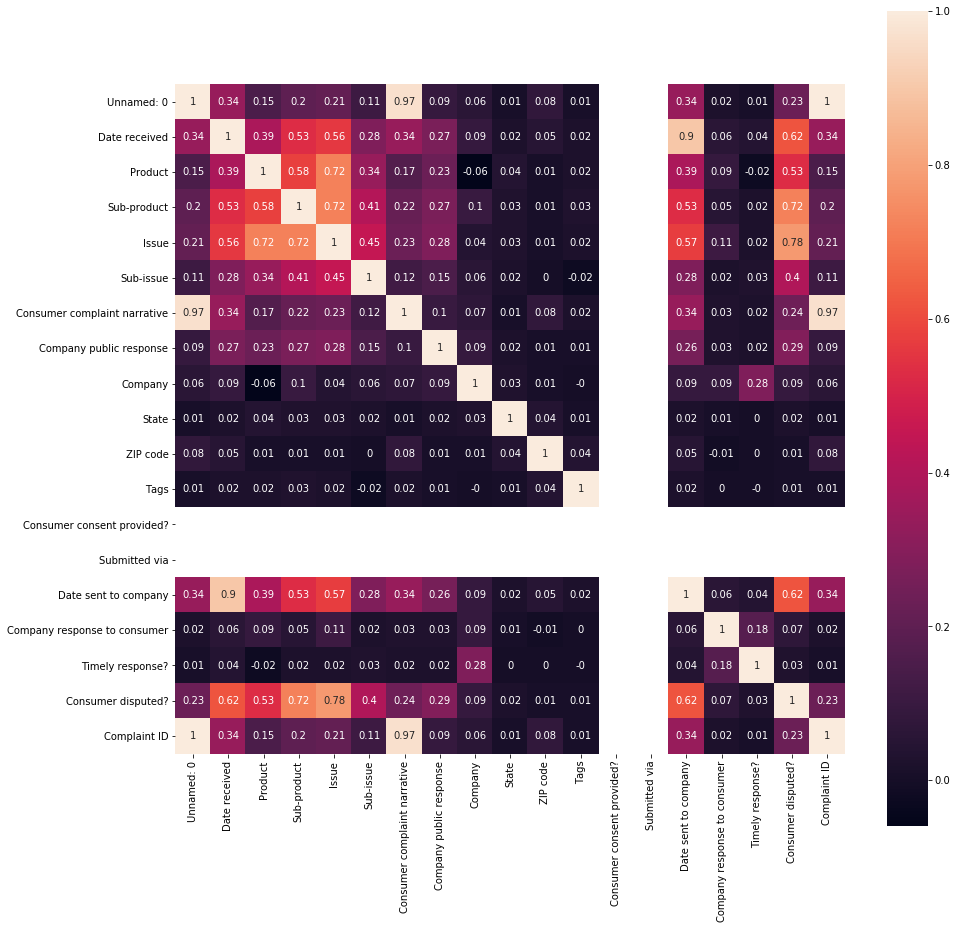

In [11]:
factorized_dataset = dataset.apply(lambda x: pd.factorize(x)[0])

corr = factorized_dataset.corr().round(2)

f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, annot=True, square=True)

Columns that contain data that is not relevant to the question have been removed from the dataset. These columns also had no correlation as the heatmap above showcases or had no meaning for our purpose.

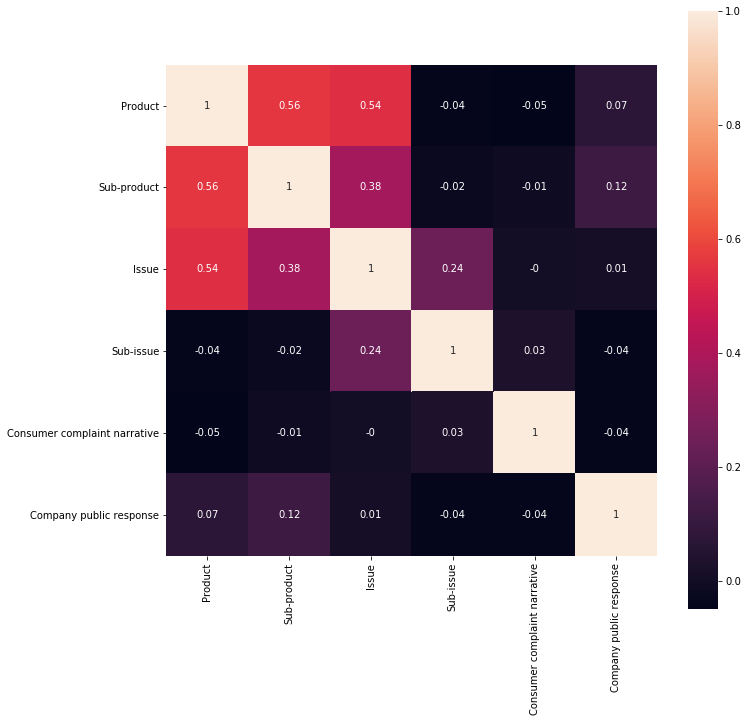

In [3]:
cleaned_dataset = dataset.drop(['Unnamed: 0', 'Date received', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Company response to consumer', 'Timely response?', 'Date sent to company', 'Consumer disputed?', 'Complaint ID'], axis=1)

factorized_cleaned_dataset = cleaned_dataset.apply(lambda x: pd.factorize(x)[0])

corr = factorized_cleaned_dataset.corr().round(2)

f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(data=corr, annot=True, square=True)

The following code encodes the 4 labels (Product, Sub-product, Issue en Sub-issue) to one-hot-encoding, these encoded values are saved in new columns. The unique label values for all columns are also stored in ids and a mapping from id to label and vice versa is stored in two dictionaries. This will be of good use in further code samples.

In [4]:
cleaned_dataset = cleaned_dataset[pd.notnull(dataset['Consumer complaint narrative'])]

cols = ['Product', 'Sub-product', 'Issue', 'Sub-issue']
ids = []
label_to_id = []
id_to_label = []

count = 0
for c in cols:
    one_hot_encoding = pd.get_dummies(cleaned_dataset[c], prefix = c)
    cleaned_dataset = pd.concat([cleaned_dataset, one_hot_encoding], axis = 1)
    
    cleaned_dataset[c + ' id'] = cleaned_dataset[c].factorize()[0]
    ids.append(cleaned_dataset[[c, c + ' id']].drop_duplicates().sort_values(c + ' id'))
    label_to_id.append(dict(ids[count].values))
    id_to_label.append(dict(ids[count][[c + ' id', c]].values))
    count += 1

cleaned_dataset.head(5)

Product  \
0  Credit reporting, credit repair services, or o...   
1                                    Debt collection   
2                                    Debt collection   
3                                    Debt collection   
4                                    Debt collection   

                             Sub-product  \
0                       Credit reporting   
1                       Payday loan debt   
2                       Credit card debt   
3  Other (i.e. phone, health club, etc.)   
4  Other (i.e. phone, health club, etc.)   

                                               Issue  \
0  Problem with a credit reporting company's inve...   
1  Threatened to contact someone or share informa...   
2                    Written notification about debt   
3              Cont'd attempts collect debt not owed   
4              Cont'd attempts collect debt not owed   

                                           Sub-issue  \
0  Their investigation did not fix an error on yo...   
1            Talked to a third-party about your debt   
2   Didn't receive enough information to verify debt   
3                                   Debt is not mine   
4                                   Debt is not mine   

                        Consumer complaint narrative  \
0  The Credit bureaus are reporting inaccurate in...   
1  I had an online payday loan from XXXX XXXX for...   
2  XXXX 's has violated 15 USC 1692 by continuing...   
3  I keep getting collection calls from Central C...   
4  I joined XXXX of XXXX ( club # XXXX ) on XXXX/...   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1                                               None   
2  Company has responded to the consumer and the ...   
3   Company chooses not to provide a public response   
4  Company believes it acted appropriately as aut...   

   Product_Bank account or service  Product_Checking or savings account  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   Product_Consumer Loan  Product_Credit card  ...  \
0                      0                    0  ...   
1                      0                    0  ...   
2                      0                    0  ...   
3                      0                    0  ...   
4                      0                    0  ...   

   Sub-issue_Unable to open an account  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Sub-issue_Unable to receive car title or other problem after the loan is paid off  \
0                                                  0                                   
1                                                  0                                   
2                                                  0                                   
3                                                  0                                   
4                                                  0                                   

   Sub-issue_Unexpected increase in interest rate  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Sub-issue_Used obscene, profane, or other abusive language  \
0                                                  0            
1                                                  0            
2                      

Some of the fields, like names, dates and other details, in the consumer complaint narratives have been replaced with x-characters and curly braces. This needs to be removed because it could have an impact on the model. Dates, more than two consecutive x-characters and curly braces have been removed.

In [5]:
import re

cleaned_dataset['Consumer complaint narrative'] = cleaned_dataset['Consumer complaint narrative'].replace(to_replace='xx/xx/\d{4}|XX/XX/\d{4}|\d\d/\d\d/\d{4}|xx/xx/\d{2}|XX/XX/\d{2}|\d\d/\d\d/\d{2}|xx+|XX+|{|}|\$\d+(\.\d+)?', value='', regex=True)

In [6]:
show_n_rows = 50

pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = show_n_rows

cleaned_dataset['Consumer complaint narrative'].head(show_n_rows)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


0     The Credit bureaus are reporting inaccurate information on my report of a bankruptcy that should not be reporting. I have tried disputing this information for almost one year and they don't seem to care or want to take it off. I contacted the Bankruptcy court and they have not reported anything to the bureaus and said third party companies maybe reporting inaccurate information.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Research and analysis of different possible modus operandi

### Exploratory Data Analysis (EDA)

#### Definition

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Source: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

#### Techniques and tools

There are a number of tools that are useful for EDA, but EDA is characterized more by the attitude taken than by particular techniques.

Interesting techniques and tools for the project are:

- Histograms
- Bivariate and Univariate Distribution Plots
- Correlation Matrix
- Targeted Projection Pursuit (TPP)
- Principal Component Analysis (PCA)
- Nonlinear Dimensionality Reduction (NLDR)

By using these techniques and tools it is possible to do two things:
1. Visualize hypothesis and confirm/reject them
2. Visualize the data to find patterns

### Supervised Machine Learning

#### Definition

Supervised learning is the machine learning task of training a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

Supervised learning is where you have input variables (x) and an output variable (y). You use an algorithm to learn the mapping function from the input to the output.

    y = f(x)

The goal is to approximate the mapping function so well that when you have a new input data (x), that you can predict the output variables (y) for that data.

Supervised learning problems can be grouped into 2 fields:
1. Classification
2. Regression

In this scenerio we will go deeper in the technology of Classification, where the output of a variable is a category (labeled).

#### Naive Bayes Classifier

This is a simple classification method based on the Bayes rule. It relies on a very simple representation of the document, called the bag of words representation.

__Advantages__:
1. Easy to implement
2. Fast
3. If the independece assumption holds then it works more efficiently than other algorithms
4. It requires less training data
5. It is highly scalable
6. It can make probabilistic predictions
7. Can handle both continuous and discrete data
8. Insensitive towards irrelevant features
9. It can work easily with missing values
10. Easy to update on arrival of new data
11. Best suited for text classification problems

__Disadvantages__:
1. The strong assumtion about the features to be independent which is hardly true in real life applications
2. Data scarcity
3. Chances of loss of accuracy
4. Zero Frequency Problem (not in training data, model doesn't recognizes it)

#### Support Vector Machines (SVM)

Commonly used for classification and regression challenges. In the Support Vector Machines (SVM) algorithm, each point is represented as a data item within the n-dimensional space where the value of each feature is the value of a specific coordinate. After plotting, classification has been performed by finding a hyperplane which differentiates two classes.

__Advantages__:
1. Even if input data are non-linear and non-separable, SVMs generate accurate classification results because of its robustness
2. In the decision function, it uses a subset of training points called support vectors hence it's memory efficient
3. It is useful to solve any complex problem with a suitable kernel function (function that transforms data into a suitable form)
4. Less risk of overfitting because of generalized SVM Models
5. SVMs work great for text classification and when finding the best linear seperator

__Disadvantages__:
1. It takes a long training time when working with large datasets
2. It is hard to understand the final model and individual impact

#### Learning Vector Quantization (LVQ)

Learning Vector Quantization (LVQ) is a prototype-based learning method. One or more prototypes are used to represent each class in the dataset, each prototype is described as a point in the feature space. New (unknown) datapoints are then assigned the class of the prototype nearest to them.

__Advantages__:
1. Simple and intuitive
2. Easy to implement while still yielding decent performance
3. Unlimited amount of prototypes per class
4. Distance measure is of choice

__Disavantages__:
1. Euclidean distance can cause problems if the data has a lot of dimensions or is noisy
2. Proper normalization and pre-processing of the feature space is necessary. But still then, dimensionality reduction is prefered.

#### K-Nearest Neighbor (KNN)


K Nearest Neighbours is a basic algorithm that stores all the available and predicts the classification of unlabelled data based on a similarity measure. The algorithm works on the assumption that similar things exist in close proximity for example in the Cartesian system.

__Advantages__:
1. One of the simplest and easiest algorithms used for classification

__Disadvantages__:
1. It doesn't work well with categorical data
2. It doesn't work well with highly dimensional data

#### Random Forest

This is an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time. The output is the class that is the mode of the classes (classification) or mean predicition (regression) of the individual trees. It is based on the concept of 'bagging', bootstrap aggregating.

__Advantages__:
1. Less chance of overfitting the training set
2. Can solve both types of problems (classification and regression) and does a decent estimation at both fronts
3. It works great with large data sets with higher dimensionality
4. It has an effective method for estimating missing data and maintains accuracy when large proportions of the data are missing

__Disadvantages__:
1. Works better for classification than regression
2. Random forest can feel like a black box approach

### Unsupervised Machine Learning

#### Definition

Unsupervised learning is a type of machine learning algorithm which is used to make conclusions from a dataset, without labeled responses.

The most common unsupervised learning method is cluster analysis, which we will also use to determine the true different clusters of Customer Complaints.

Several Cluster Analysis algorithms are:

- K-Means Clustering
- Gaussian Mixture models
- Birch
- Mean-Shift Clustering
- Agglomerative Hierarchical Clustering

and many more.

First things first, the advantages and disadvantages of some of these clustering algorithms will be analysed.


#### K-Means Clustering

The K-Means Clustering algorithm clusters data by seperating samples in n groups of equal variance, while minimizing the inertia.

**Advantages:**
- Easy to understand and implement
- Works well in practice
- Scales well to large number of samples

**Disadvantages:**
- Requires the number of clusters to be specified
- It may converge to a local optima depending on the initializing parameters
- Can be computationally expensive
- It is susceptible to outliers

The disadvantages can be conquered by:
- Severel different initialization parameters
- Use batch K-Means to solve the computational expensive operations
- Pre-process our data to exclude outliers

Sidenote: K-Means can be used for vector quantization. This is achieved by using the transform method of a trained model of K-Means.

#### Agglomerative Hierarchical Clustering

This algorithm falls into two categories: 
1. Top-Down (will not be explained)
2. Bottom-Up

Bottom-up algorithms treat each data point as a single cluster in the beginning, and then successively merge pairs of clusters untill all clusters have been mergend into a single cluster that contains all data points. The root is the cluster that gathers all the samples.

**Advantages:**
- Does not require to specify the number of clusters but it is possible
- Insensitive to the choice of distance metrics
- Best used for the discovery of the hidden hierarchy

**Disadvantages:**
- Low efficiency, high computing power needed (time complexity of n³)

#### Expectation - Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

Improvement of the K-Means algorithm. One of the major drawbacks of K-Means is its naive use of the mean value for the cluster center. This can give problems for clusters that are not circular. 

With the GMM, we assume that the data points are Gaussian distributed. To find the parameters of the Gaussian for each cluster (mean and standard deviation), the EM algorithm is needed. 

**Advantages:**
- More flexible for cluster covariance than K-Means
- Every datapoint can belong to multiple clusters (mixed membership)

**Disadvantages:**
- Doesn't work well with high dimensionality
- User must specify the number of mixture models that the algorithm will try and fit to the training set

#### Mean-Shift Clustering

Mean-Shift Clustering aims to discover blobs in a smooth density of samples. It works by updating candidates for centroids to be the mean of the point within a given region.

**Advantages:**
- The algorithm automatically sets the number of clusters, instead of relying on a number of clusters as parameter.
- The entire end result is controlled by one parameter, the kernel bandwith value.

**Disadvantages:**
- Not highly scalable, as it requires multiple nearest neighbors searches during the execution of the algorithm

The upside of the 'slowness' of Mean-Shift algorithm is that it is highly parallelizable.

### Sources

- http://en.wikipedia.org/

- https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16

- https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/

- https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

- https://www.educba.com/

- https://www.quora.com/What-are-the-advantages-and-disadvantages-for-a-random-forest-algorithm

- https://www.scikit-learn.org

- https://www.ritchieng.com/machine-learning-project-customer-segments/

- https://www.mathworks.com/discovery/unsupervised-learning.html

- https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

## Supervised Learning Implementation

For supervised machine learning, we have decided to implement Naive Bayes Classifier, Support Vector Machines and Random Forest because of the advantage described above. We won't implement K-Nearest Neighbor because it doesn't work well with categorical data and we also won't implement Learning Vector Quantization because of the difficulty level.

We will be focussing on predicting products because products are very specific labels and to us, it seems useful to be able to predict the product to which a complaint belongs so that the correct people can handle a complaint based on the predicted product. The issue would also be a good label to predict but there is a bigger chance that new issue labels will exist in the future while product labels will probably not change that fast.

### Naive Bayes Classifier

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gwerrebr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gwerrebr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gwerrebr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The following code sample is useful to have an idea of the top 2 correlated uni- and bigrams for each product. To find the correlated words we use vectorization in combination with a function called chi2. This function uses the vectorized features to determine correlations between words and labels (here products).

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_words)
features = tfidf.fit_transform(dataset['Consumer complaint narrative'])
labels = cleaned_dataset['Product id']

N = 2
for label, label_id in sorted(label_to_id[0].items()):
    features_chi2 = chi2(features, labels == label_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("'{}':".format(label))
    print("\tMost correlated unigrams: {}".format(', '.join(unigrams[-N:])))
    print("\tMost correlated bigrams: {}\n".format(', '.join(bigrams[-N:])))

'Bank account or service':
	Most correlated unigrams: bank, overdraft
	Most correlated bigrams: overdraft fees, checking account

'Checking or savings account':
	Most correlated unigrams: overdraft, deposit
	Most correlated bigrams: savings account, checking account

'Consumer Loan':
	Most correlated unigrams: car, vehicle
	Most correlated bigrams: chrysler capital, auto loan

'Credit card':
	Most correlated unigrams: macy, card
	Most correlated bigrams: american express, credit card

'Credit card or prepaid card':
	Most correlated unigrams: express, card
	Most correlated bigrams: american express, credit card

'Credit reporting':
	Most correlated unigrams: equifax, experian
	Most correlated bigrams: disputed please, manner soon

'Credit reporting, credit repair services, or other personal consumer reports':
	Most correlated unigrams: report, equifax
	Most correlated bigrams: identity theft, credit report

'Debt collection':
	Most correlated unigrams: collection, debt
	Most correlated 

Remove the factorized columns because we will use the columns with the one-hot-encoding to train models. This because factorized values can have a bad effect on classification. One-hot-encoding doesn't have this issue.

In [74]:
cols = ['Product', 'Sub-product', 'Issue', 'Sub-issue']

for c in cols:
    del cleaned_dataset[c + ' id']

The next step is to find good hyperparameter values for the chosen classification techniques. This is accomplished by using gridsearchcv to compute all combinations of the listed parameters and test which have the best result in terms of accuracy. The params that are tested are listed in a parameter grid. We also use pipelines, this enables us to easily transform data in a manner which uses the output of the previous transformation as the input of the next transformation. Gridsearch also does crossvalidation, we have chosen to use a 5-fold cross validation strategy to check the hyperparameters and accuracy.

The output shows the accuracy meassures and the best parameter values from the grid.

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(encoding='latin-1', stop_words=stop_words)),
    ('mnb_clf', OneVsRestClassifier(MultinomialNB(class_prior=None))),
])

parameters  = {
    'tfidf__sublinear_tf': [True, False],
    'tfidf__norm': ('l1', 'l2', None),
    'tfidf__min_df': [1, 5, 10, 25, 50],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'mnb_clf__estimator__fit_prior':  [True, False],
    'mnb_clf__estimator__alpha': (1, 0.1, 0.01, 0.001)
}

clf = GridSearchCV(clf_pipeline, parameters, cv=5, n_jobs=-1, verbose=10)
grid_result = clf.fit(X_train, y_train)

best_params = grid_result.best_params_

print(best_params)
print(classification_report(y_test, clf.predict(X_test), digits=4))

(325419,)
(160282,)
Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 57.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 63.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 74

{'mnb_clf__estimator__alpha': 0.01, 'mnb_clf__estimator__fit_prior': False, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': False}
                                                                              precision    recall  f1-score   support

                                                     Bank account or service     0.5758    0.3355    0.4240      4912
                                                 Checking or savings account     0.5392    0.7548    0.6290      6199
                                                               Consumer Loan     0.5132    0.2367    0.3240      3126
                                                                 Credit card     0.5437    0.2710    0.3617      6217
                                                 Credit card or prepaid card     0.5316    0.7713    0.6294     10389
                                                            Credit reporting     0.7493    0.4061    0.5267     10

The next code sample trains the model with the best hyperparameter values from the result above.

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=1, ngram_range=(1, 2), norm='l2', sublinear_tf=False, encoding='latin-1', stop_words=stop_words)),
    ('mnb_clf', OneVsRestClassifier(MultinomialNB(alpha=0.01, fit_prior=False, class_prior=None))),
])

clf = clf_pipeline.fit(X_train, y_train)
prediction = clf_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

(325419,)
(160282,)
Test accuracy is 0.7527919541807564


We can test the model by using text input and by letting it predict a label (product) for the input.

In [76]:
print(clf.predict(["I would like to get a loan for a house"]))

['Mortgage']


The confusion matrix displays the accuracy when using the test set. We can conclude that this model has an average to good accuracy. Certain products are not predicted correctly, this is mainly the case for the products "Money transfer" and virtual currency. The main reason for this is that certain complaints can be labeled with multiple labels and this makes it more difficult to predict a correct label. A complaint could, for example, be about buying bitcoins with a credit card, we humans would label this as "Virtual currency" but this model doesn't. It will rather label that with some product about credit cards.

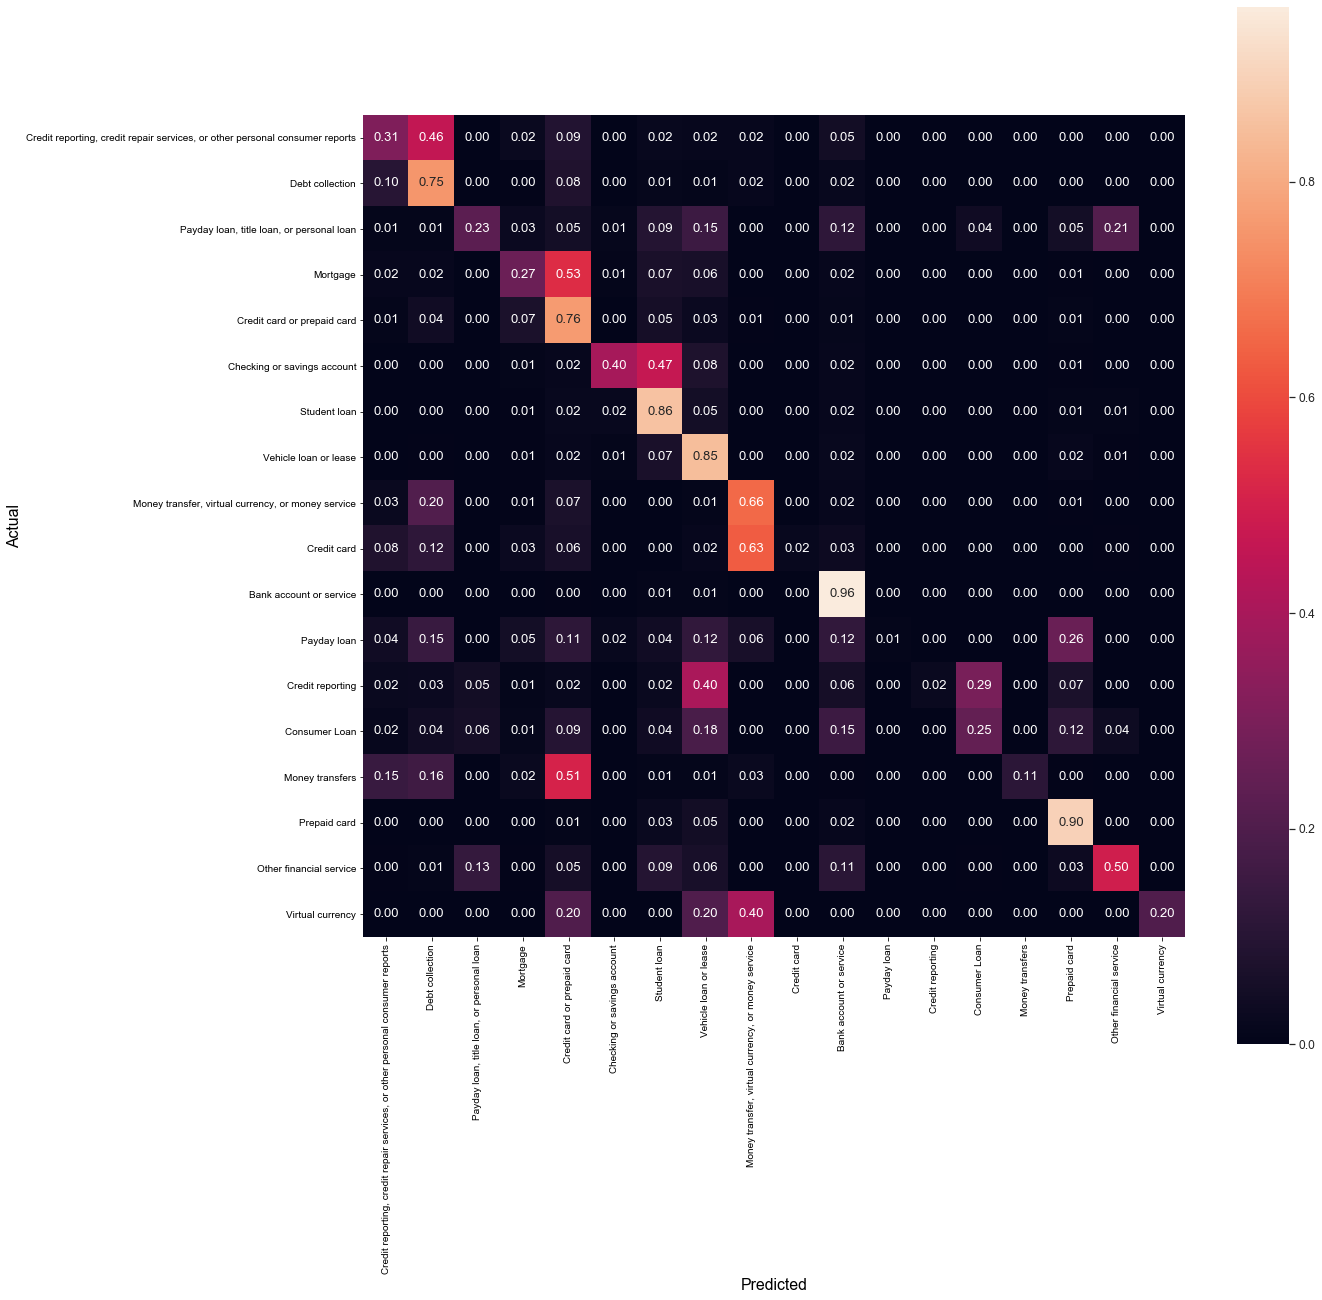

In [77]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, prediction, normalize='true')
fig, ax = plt.subplots(figsize=(15,15))
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(conf_mat, annot=True, fmt='.2f', square=True, 
            xticklabels=label_to_id[0], 
            yticklabels=label_to_id[0])
plt.ylabel('Actual', size='large')
plt.xlabel('Predicted', size='large')

plt.show()

#### Conclusion Confusion Matrix

As you can see in the result above is that there are several outlier correlations between labels:

    1. Money Transfer & Credit Card or prepaid card
    2. Credit Reporting & Vehice loan or lease
    3. Virtual Currency & Money transfer, virtual currency, or money service
    4. Credit Reporting, Credit Repair Services, or other personal consumer reports & Debt Collection
    5. Mortage & Credit Card or prepaid Card
    6. Money transfer, virtual currency, or money service & Credit Card

**But why are there outliers?**

1. This outcome is because some of these labels are mis-labeled.

    For example: Money Transfer, Virtual Currency, or Money Service & Credit Card have a high correlation. Virtual Currency & Credit Card have a correlation of 0. Virtual Currency & Money Transfer, Virtual Currency, or Money Service also have a correlation of 0. Virtual Currency should not be in the label of 'Money Transfer, Virtual Currency or Money Service'.


2. Some of the labels are mis-predicted, this can be because of the inbalanced dataset and the higher/lower occurance of specific labels. You can solve this by rebalancing the dataset, regarding the notion that it is not recommended to fully balance out the dataset because of potential loss of accuracy. 

    As previously said, we haven't rebalanced the dataset but we have used a stratified approach. This has some benefits as described before in this document but a disadvantage is that categories that are highly underrepresented will stay underrepresented, one of the best examples of this is the virtual currency label.


3. Some of the labels are overlapping other labels. This is why some labels occure quite more often than other labels, even if they are quite alike.

    For example: Credit Reporting, Credit Repair Services, or other personal consumer reports & Credit Reporting have a correlation of 0. The 'Credit Reporting' label is overrun by the 'Credit Reporting, Credit Repair Services, or other personal consumer reports'.

### Support Vector Machines (SVM)

This type of classifier will be implemented in the same way. The first step again is to find the best hyperparameter values.

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
stop_words = set(stopwords.words('english'))

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('vectorize', CountVectorizer(ngram_range=(1,2), stop_words=stop_words)),
    ('tfidf', TfidfTransformer()),
    ('svc_clf', LinearSVC(multi_class='ovr')),
])

parameters  = {
    'vectorize__min_df': [0.01, 0.05, 0.1],
    'vectorize__max_df': [0.4, 0.6, 0.8],
    'tfidf__norm': ('l1', 'l2'),
    'tfidf__use_idf': [True, False],
    'tfidf__sublinear_tf': [True, False],
    'svc_clf__loss': ('hinge', 'squared_hinge'),
}

clf = GridSearchCV(clf_pipeline, parameters, cv=5, n_jobs=-1, verbose=10)
grid_result = clf.fit(X_train, y_train)

best_params = grid_result.best_params_

print(best_params)
print(classification_report(y_test, clf.predict(X_test), digits=4))

(325419,)
(160282,)
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 51.1min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed: 76.0min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 87.9min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 105.3min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 124.0min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed: 149.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 172.3min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 194.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 214.0min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elap

{'svc_clf__loss': 'squared_hinge', 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True, 'tfidf__use_idf': False, 'vectorize__max_df': 0.6, 'vectorize__min_df': 0.01}
                                                                              precision    recall  f1-score   support

                                                     Bank account or service     0.6032    0.4748    0.5313      4912
                                                 Checking or savings account     0.6361    0.6803    0.6575      6199
                                                               Consumer Loan     0.5294    0.2220    0.3128      3126
                                                                 Credit card     0.5894    0.3589    0.4461      6217
                                                 Credit card or prepaid card     0.6082    0.6808    0.6424     10389
                                                            Credit reporting     0.6546    0.2278    0.3380     10424
Credit rep

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
stop_words = set(stopwords.words('english'))

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('vectorize', CountVectorizer(min_df=0.01, max_df=0.6, ngram_range=(1,2), stop_words=stop_words)),
    ('tfidf', TfidfTransformer(norm='l2', sublinear_tf=True, use_idf=False)),
    ('svc_clf', LinearSVC(multi_class='ovr', loss='squared_hinge')),
])

clf = clf_pipeline.fit(X_train, y_train)
prediction = clf_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

(325419,)
(160282,)
Test accuracy is 0.7183651314558092


In [79]:
print(clf.predict(["I would like to get a loan for a house"]))

['Mortgage']


The confusion matrix shows that the model has an average to good accuracy. We can draw the same conclusion as for the Naive Bayes Classifier. The model has good accuracy but certain products have a bad prediction rate because of the same reason as described above.

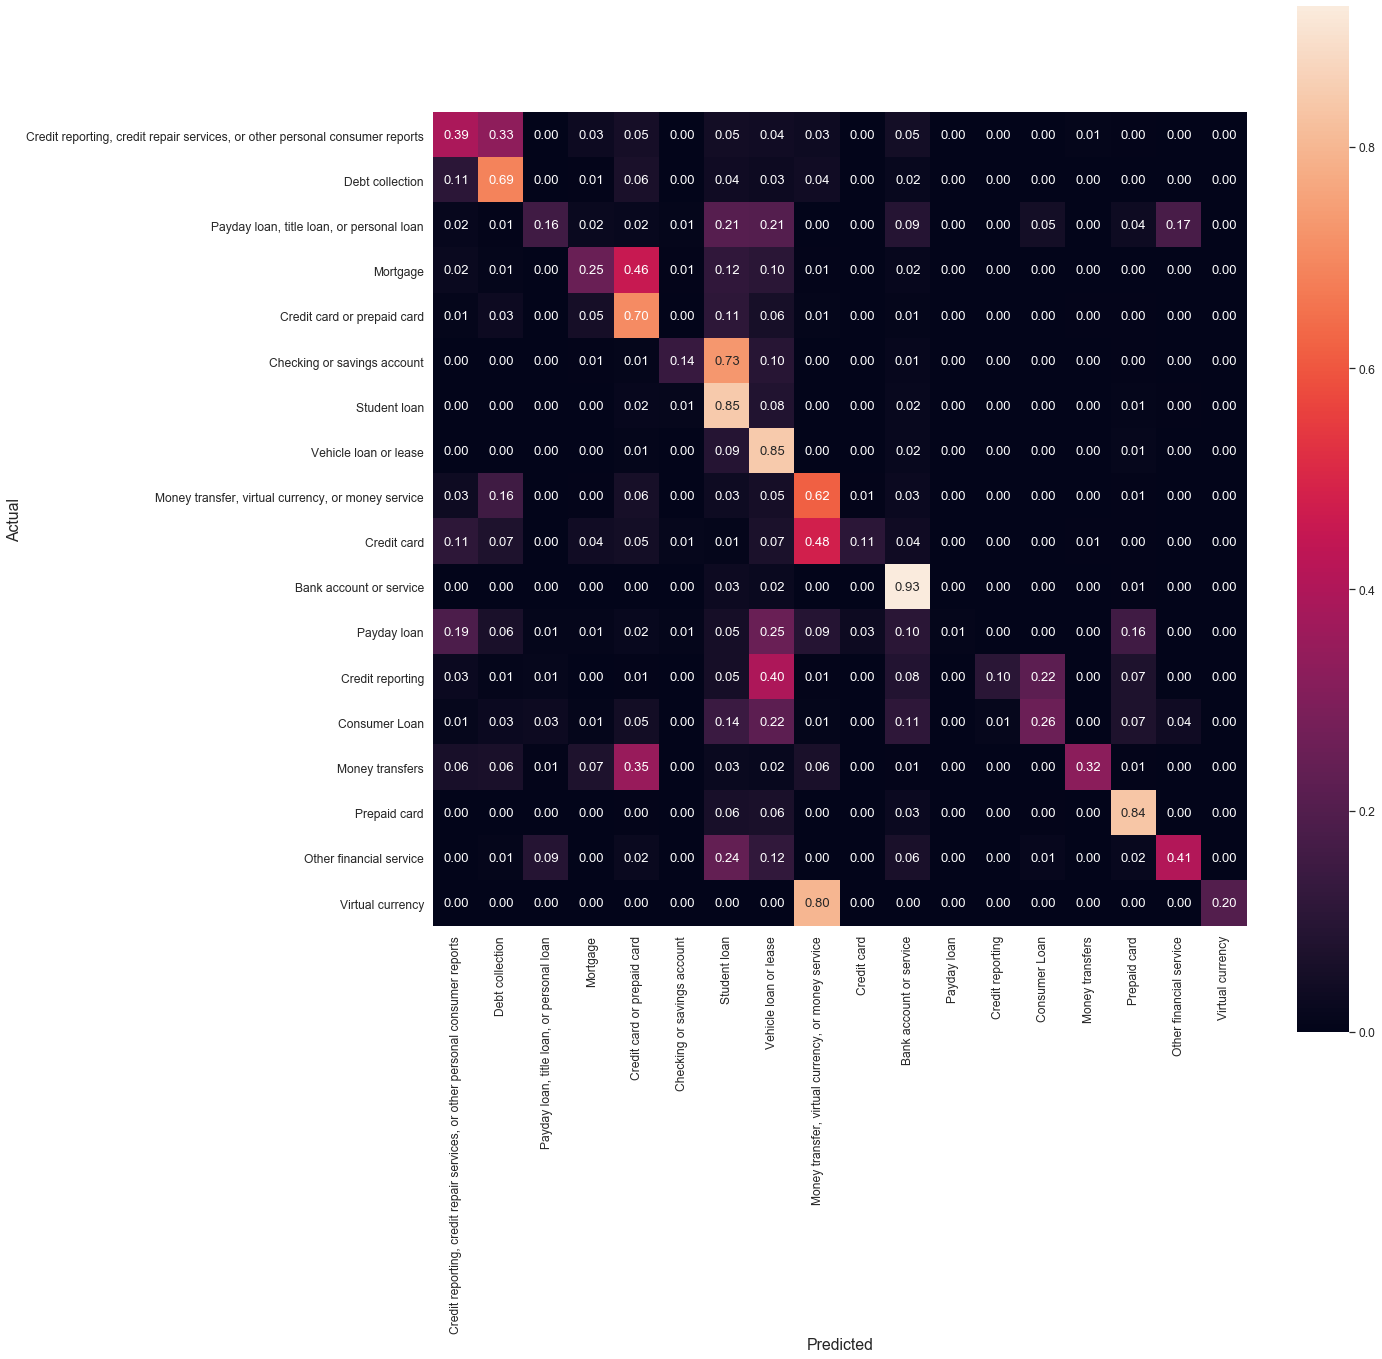

In [80]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, prediction, normalize='true')
fig, ax = plt.subplots(figsize=(15,15))
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(conf_mat, annot=True, fmt='.2f', square=True, 
            xticklabels=label_to_id[0], 
            yticklabels=label_to_id[0])
plt.ylabel('Actual', size='large')
plt.xlabel('Predicted', size='large')

plt.show()

#### Conclusion Confusion Matrix

The results are quit alike as the previous results of Naïve Bayes. Again there are situations of mislabeling, inbalanced dataset and overlapping labels. 

A big example of overlapping labels is again visible with Virtual Currency. If the text is about Virtual Currency, there is a 0.80 correlation with Money Transfer, Virtual Currency, or Money Service. If you do the opposite operation, there is a 0.00 correlation between the two labels. The Virtual Currency label is completely overrun by 'Money Transfer, Virtual Currency, or Money Service'.

### Random Forest Classification

The last implementation of a supervised classifier is the Random Forest Classifier. We use the same steps as before to get a classifier with good hyperparameter values.

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
stop_words = set(stopwords.words('english'))

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(encoding='latin-1', stop_words=stop_words)),
    ('rfc_clf', RandomForestClassifier()),
])

parameters  = {
    'tfidf__norm': ['l2'],
    'tfidf__ngram_range': [(1, 2)],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__min_df': [0.01, 0.05, 0.1],
    'tfidf__max_df': [0.6, 0.7, 0.8],
    'rfc_clf__max_depth': [200, 700, 1400, None],
    'rfc_clf__n_estimators': [10, 20, 40, 120],
}

clf = GridSearchCV(clf_pipeline, parameters, cv=5, n_jobs=-1, verbose=10)
grid_result = clf.fit(X_train, y_train)

best_params = grid_result.best_params_

print(best_params)
print(classification_report(y_test, clf.predict(X_test), digits=4))

(325419,)
(160282,)
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 57.8min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 71.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 80.8min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 99.8min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 120.1min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 148.0min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed: 167.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 192.2min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed: 247.1min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed: 286.9min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elap

{'rfc_clf__max_depth': 700, 'rfc_clf__n_estimators': 120, 'tfidf__max_df': 0.8, 'tfidf__min_df': 0.01, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': 'l2', 'tfidf__sublinear_tf': True}
                                                                              precision    recall  f1-score   support

                                                     Bank account or service     0.5546    0.4662    0.5066      4912
                                                 Checking or savings account     0.5768    0.6109    0.5933      6199
                                                               Consumer Loan     0.5291    0.1571    0.2422      3126
                                                                 Credit card     0.5747    0.3101    0.4028      6217
                                                 Credit card or prepaid card     0.5893    0.6513    0.6187     10389
                                                            Credit reporting     0.8809    0.2561    0.3969 

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
stop_words = set(stopwords.words('english'))

y = cleaned_dataset['Product']
X_train, X_test, y_train, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

print(X_train.shape)
print(X_test.shape)

clf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=0.01, max_df=0.8, sublinear_tf=True, ngram_range=(1, 2), norm='l2', encoding='latin-1', stop_words=stop_words)),
    ('rfc_clf', RandomForestClassifier(n_jobs=-1, max_depth=700, n_estimators=120)),
])

clf = clf_pipeline.fit(X_train, y_train)
prediction = clf_pipeline.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

(325419,)
(160282,)
Test accuracy is 0.7353040266530241


In [82]:
print(clf.predict(["I would like to get a loan for a house"]))

['Mortgage']


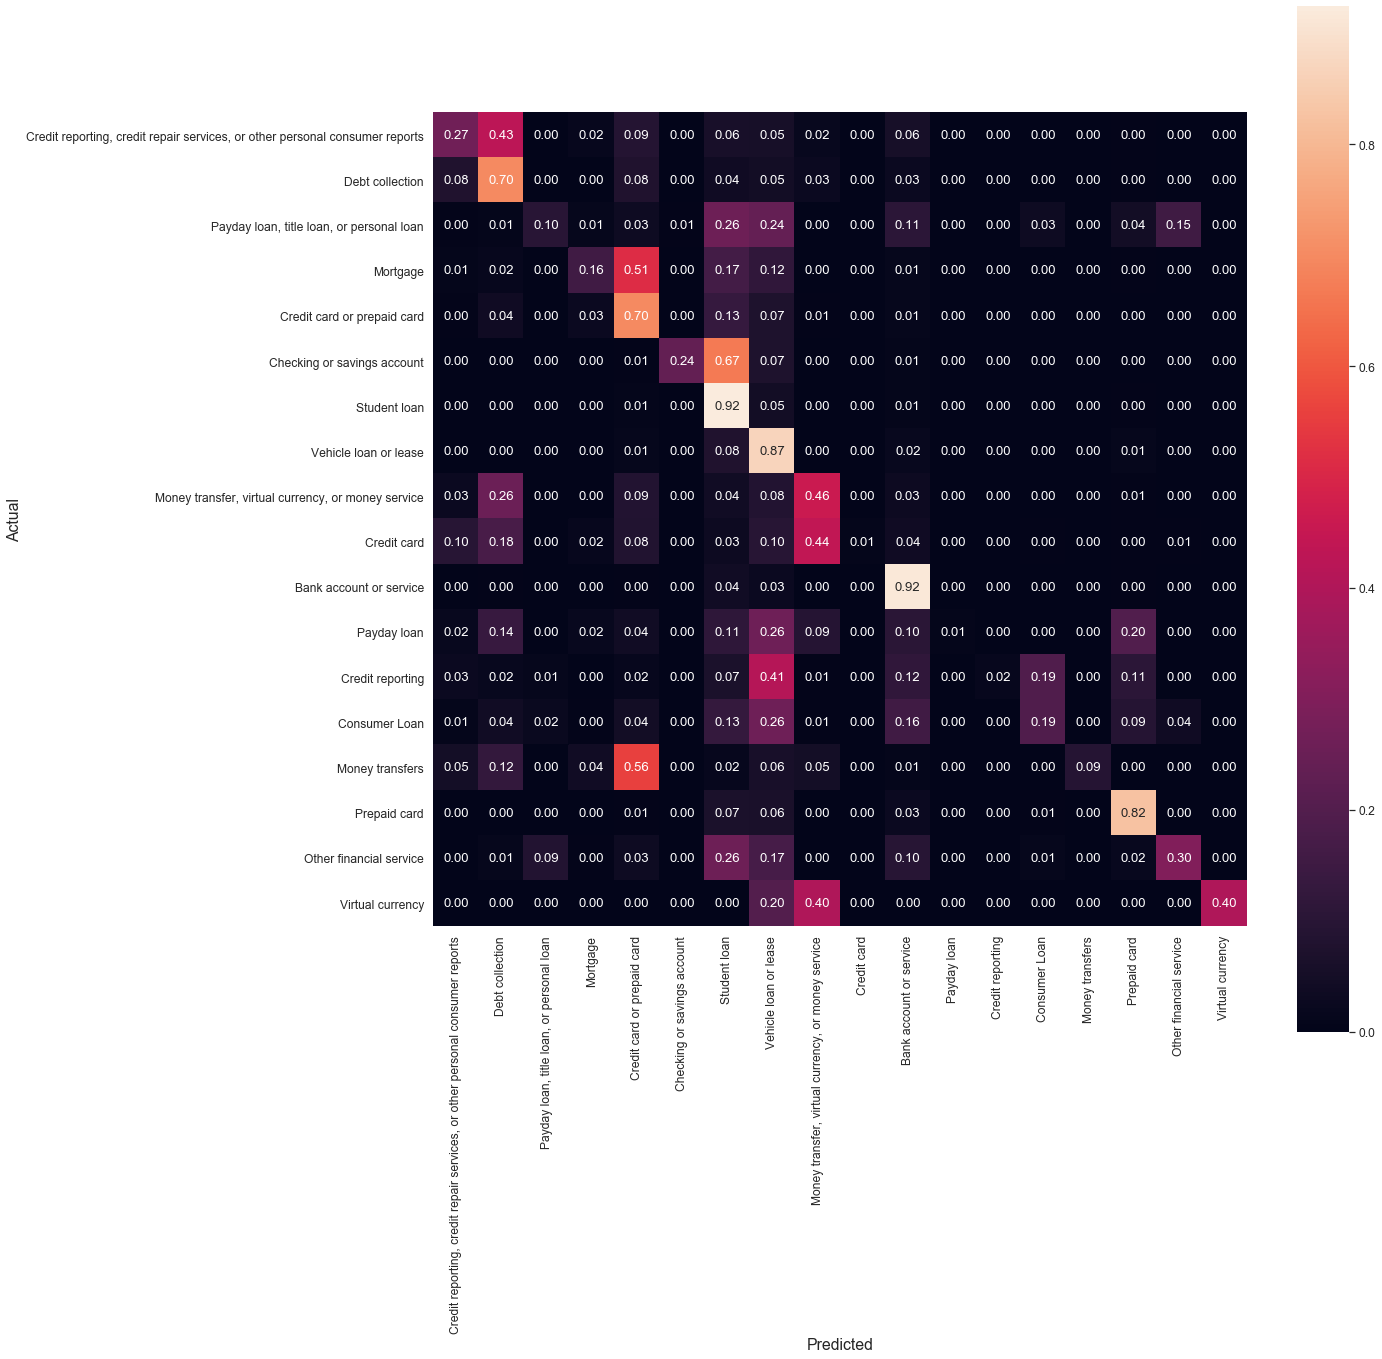

In [83]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, prediction, normalize='true')
fig, ax = plt.subplots(figsize=(15,15))
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(conf_mat, annot=True, fmt='.2f', square=True, 
            xticklabels=label_to_id[0], 
            yticklabels=label_to_id[0])
plt.ylabel('Actual', size='large')
plt.xlabel('Predicted', size='large')

plt.show()

#### Conclusion Confusion Matrix

Again the results are quite the same as the previous results. There is less overlapping of labels but it becomes more visible that some lables are redundant.

For example: Money transfer, Virtual Currency, or Money Service have a correlation of 0.00 with Virtual Currency, 0.00 with Money transfer and 0.46 with itself, which gives the impression that the label should be renamed as 'Money Service' (as this is not a label this is a prediction).

### Neural networks

A neural network is a good unsupervised machine learning tool for data processing, regression analysis, pattern recognition, classification and so on. There are many types of neural networks but one of the most common used for NLP is a Recurrent Neural Network (RNN) which is derived from a Feedforward Neural Networks and which is good at processing variable length sequences of input. RNNs are good for things like handwritting recognition, speech recognition, text analysis, text classification, etc. One specific from of RNN is Long Short-Term Memory (LSTM) which is used in deep learning and has been used by Google for their Google translate tool. This proves its strenght within NLP and will be used to classify Consumer Complaint Narattives, again by only looking at the Product as a label.

The first step is to get all necessary dependencies for training a neural network. NLTK will mainly be used for stopwords, word tokenization and Lemmatization which are all data processing techniques. Stop words is something that has been used before in this notebook and has the purpose of removing stop words from the naratives because they don't add meaning to it. Tokenizing the words will create vectors from the naratives and Lemmatization is similar to stemming, which won't be used here, but it brings context to the words, it links words with similar meaning to one word. Some of the other dependencies are from keras and tensorflow to create a model for the neural network, add layers, pad sequences before giving them as input to the neural network, a loss function for the model, etc.

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
stop_words = set(stopwords.words('english')) 
lemma=WordNetLemmatizer()
import re

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, GlobalMaxPool1D
from keras.models import Model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

Using TensorFlow backend.


In [29]:
%%time

from sklearn.model_selection import train_test_split

def clean_col(col):
    cleaned_col = []
    for r in range(0,len(col)):
        row = str(col[r])
        row = re.sub('[^a-zA-Z]',' ', row)

        word_tokens = word_tokenize(row)
        
        row = []
        for w in word_tokens:
            if w not in stop_words:
                row.append(w)
        
        row = [lemma.lemmatize(w) for w in word_tokenize(str(row).lower())]
        row = ' '.join(row)
        cleaned_col.append(row)
    return cleaned_col

y = cleaned_dataset['Product']
X, X_test, Y, y_test = train_test_split(cleaned_dataset['Consumer complaint narrative'], y, random_state=None ,test_size=0.33, stratify=y)

X = clean_col(X.values)
X_test = clean_col(X_test.values)

CPU times: user 28min 49s, sys: 5.77 s, total: 28min 55s
Wall time: 28min 55s


In [ ]:
print(len(X))
print(len(Y))
print(len(X_test))
print(len(y_test))

The next step is to count the unique words to know how many different tokens will be needed.

In [30]:
all_words = ' '.join(X)
all_words = word_tokenize(all_words)
dist = FreqDist(all_words)

unique_word_count = len(dist)
print(unique_word_count)

95674


Now the X and X_test set will be transformed to tokenized sequences.

In [31]:
tokenizer = Tokenizer(num_words = unique_word_count)
tokenizer.fit_on_texts(X)
x_train_tokens = tokenizer.texts_to_sequences(X)
x_test_tokens = tokenizer.texts_to_sequences(X_test)

In [32]:
num_tokens = [len(tokens) for tokens in x_train_tokens]
num_tokens = np.array(num_tokens)

The average number of tokens in a consumer complaint:

In [33]:
np.mean(num_tokens)

204.50945089254162

The max number of tokens in a consumer complaint:

In [34]:
np.max(num_tokens)

11158

The max number of tokens that will be used per sequence is set to the average plus 2 standard deviations, which will cover around 95% of the dataset. This means that some complaints will be shortened due to the fact that they have too many words in their sequence, this will not affect the end result too much. The sequences with less tokens than this will be padden with zero-values.

In [35]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

661

The dataset coverage when using the above value for the max amount of tokens in each sequence.

In [36]:
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9593815972638352

In [37]:
pad = 'pre'
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens, padding=pad, truncating=pad)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens, padding=pad, truncating=pad)

The next is an example of one of the sequences without and with pre-padding.

In [38]:
np.array(x_train_tokens[0])

array([   1,   81,    1,   11,    1,  481,    1,   20,    1,  128,    1,
        359,    1,  277,    1,  273,    1,    1,    2,    1,  222,    1,
         11,    1,  479,    1, 1412,    1,    1,    2,    1,   21,    1,
         14,    1,  123,    1, 1924,    1,  506,    1,  190,    1,    1,
          2,    1, 1679,    1,   29,    1,   32,    1,   17,    1,   51,
          1,   26,    1,   41,    1,    1,    2,    1,  799,    1,    1,
          2,    1,  569,    1,  795,    1,   32,    1,    1,    2,    1,
       3466,    1,  851,    1,  168,    1,  746,    1,  241,    1,  101,
          1,  330,    1,  340,    1,   11,    1,    1,    2,    1,  241,
          1,   59,    1,   11,    1,  188,    1,   95,    1,    1,  534,
          1,  476,    1,    1,  400,    1,    1,   81,    1,    1, 1251,
          1, 1918,    1,  330,    1,  340,    1,    1,    2,    1,  141,
          1,   91,    1,   32,    1, 4435,    1,  178,    1,  774,    1,
       1441,    1,    1,    2,    1,   26,    1,   

In [39]:
x_train_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

The labels (train and validation set) will be one-hot encoded to be used in the model.

In [40]:
values = array(Y.values.ravel())
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y_encoded = onehot_encoder.fit_transform(integer_encoded)
print(Y_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
values_0 = array(y_test.values.ravel())
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values_0)
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y_encoded_test = onehot_encoder.fit_transform(integer_encoded)
print(Y_encoded_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


The next step is to form the layers of the neural network. The setup of the layers is a more common setup. The first layer is an embedding layer which will store one vector per word, when this layers is used it will convert the sequences of word indices into sequences of vectors. Words with similar meaning will often have similar vectors. The next layer is for global max pooling, like a convolutional neural network an RNN has fully connected layers, but instead of passing all the data to the next layer it is sometimes useful to only pass on compressed forms of this data or parts of it that have higher importance, this is what global max pooling will do.

There are also two dropout layers, this is a common practice to overcome overfitting in unsupervised machine learning with neural networks. These dropout layers do as its name says, it dropsout certain values. It is a regularization technique patented by Google and what it does is it drops out random vectors between layers. There are also two dense layers, these are just normal layers in which each input neuron is connected to the output neuron.

The used variables for each layer are not that special or aren't specifically chosen. The loss function for example is a common used method.

The model summary shows that this neural network consists of over 10 000 000 parameters.

In [43]:
inp = Input(shape = (max_tokens,))
x = Embedding(unique_word_count, 128)(inp)
x = LSTM(60, return_sequences = True, name = 'lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.10) (x)
x = Dense(50, activation = "tanh")(x)
x = Dropout(0.10)(x)
x = Dense(18, activation = "sigmoid")(x)
model = Model(inputs = inp, outputs = x)
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 661)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 661, 128)          12246272  
_________________________________________________________________
lstm_layer (LSTM)            (None, 661, 60)           45360     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0   

In [44]:
%%time
batch_size = 32
epochs = 10 # cycles
history = model.fit(x_train_pad, Y_encoded, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 292877 samples, validate on 32542 samples
Epoch 1/10
292877/292877 [==============================] - 5014s 17ms/step - loss: 0.9705 - accuracy: 0.6681 - val_loss: 0.7735 - val_accuracy: 0.7204
Epoch 2/10
292877/292877 [==============================] - 4981s 17ms/step - loss: 0.7465 - accuracy: 0.7348 - val_loss: 0.7173 - val_accuracy: 0.7441
Epoch 3/10
292877/292877 [==============================] - 4974s 17ms/step - loss: 0.6695 - accuracy: 0.7628 - val_loss: 0.7050 - val_accuracy: 0.7488
Epoch 4/10
292877/292877 [==============================] - 4977s 17ms/step - loss: 0.6122 - accuracy: 0.7825 - val_loss: 0.7135 - val_accuracy: 0.7497
Epoch 5/10
292877/292877 [==============================] - 4967s 17ms/step - loss: 0.5590 - accuracy: 0.8026 - val_loss: 0.7232 - val_accuracy: 0.7515
Epoch 6/10
292877/292877 [==============================] - 5040s 17ms/step - loss: 0.5103 - accuracy: 0.8203 - val_loss: 0.7511 - val_accuracy: 0.7450
Epoch 7/10
292877/292877 [===========

In [45]:
%%time
result = model.evaluate(x_test_pad, Y_encoded_test)

160282/160282 [==============================] - 562s 4ms/step
CPU times: user 9min 28s, sys: 5.56 s, total: 9min 33s
Wall time: 9min 21s


In [46]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 74.46%


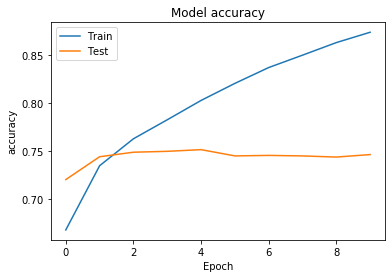

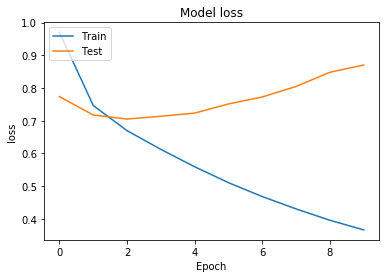

In [47]:
def plot_graphs(history, string):
    # Plot training & validation accuracy values
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title('Model '+string)
    plt.ylabel(string)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

The graphs above show the accuracy and loss of both training and validation dataset. Both validation curves seem to diverge from the training curve, this is usually an indication of overfitting. We can conclude that after one or two epochs the neural network is trained with an accuary of around 74% without the side effect of overfitting.

### General Conclusion

Our conclusion is that the labels are not correctly chosen:
1. A label can consist of several other labels
2. A stand-alone label can be found in a label that consists of multiple labels (example: 'Credit Reporting, Credit Repair Services, other personal consumer reports' also contains 'Credit Reporting', which is a stand-alone label).

Our recommandation is to merge several labels, who have almost no point to be stand-alone labels. 

For example: 'Virtual Currency' as a stand-alone label is overrun by the label 'Money Transfer, Virtual Currency, or money service'. 

By merging the labels, the dataset will be more in balance and the final results will be more accurate. This will give a higher accurancy but less specific labeling because of the fact that there would be less labels to choose from.

## Unsupervised Learning Implementation

As mentioned before, the focus will be on Clustering Algorithms. The first step when applying a clustering algorithm is representing your data in a mathematical manner.

### K-means clustering

The k-means clustering algorithm is a method of vector quantization, that aims to partition n observations or data points into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

K-means is very sensitive to outliers in the dataset. PCA can be used to partially reduce the effect of outliers. In the code below SVD (Singular value decomposition), which is similar to PCA, is used to reduce the dimension on the data to 100 features, after that the data is also normalized.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

data = cleaned_dataset['Consumer complaint narrative'].to_list()

tf_idf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X = tf_idf_vectorizer.fit_transform(data)

# tf_idf_norm = normalize(tf_idf)

svd = TruncatedSVD(n_components=100)
normalizer = Normalizer(copy=False)
norm = make_pipeline(svd, normalizer)

data_norm = norm.fit_transform(X)

The code below will be used to plot silhouette graphs and scatter plots.

In [212]:
# SOURCE: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html?highlight=clustering%20text

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_silhouette_graph_and_clusters(X, n_clusters, clusterer, cluster_labels):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

    plt.show()

The code below computes clusters using k-means starting from 2 clusters up to 24. This was the initial try but there is no nod visible (elbow method) in the graph.

[2020-04-19 16:05:49] Computing k = 2
[2020-04-19 16:07:25] Computing k = 3
[2020-04-19 16:09:56] Computing k = 4
[2020-04-19 16:12:44] Computing k = 5
[2020-04-19 16:16:18] Computing k = 6
[2020-04-19 16:20:52] Computing k = 7
[2020-04-19 16:25:32] Computing k = 8
[2020-04-19 16:32:12] Computing k = 9
[2020-04-19 16:36:55] Computing k = 10
[2020-04-19 16:42:50] Computing k = 11
[2020-04-19 16:48:30] Computing k = 12
[2020-04-19 16:54:08] Computing k = 13
[2020-04-19 17:02:31] Computing k = 14
[2020-04-19 17:09:13] Computing k = 15
[2020-04-19 17:15:17] Computing k = 16
[2020-04-19 17:21:45] Computing k = 17
[2020-04-19 17:29:45] Computing k = 18
[2020-04-19 17:37:42] Computing k = 19
[2020-04-19 17:46:07] Computing k = 20
[2020-04-19 17:54:02] Computing k = 21
[2020-04-19 18:01:27] Computing k = 22
[2020-04-19 18:10:03] Computing k = 23
[2020-04-19 18:17:59] Computing k = 24


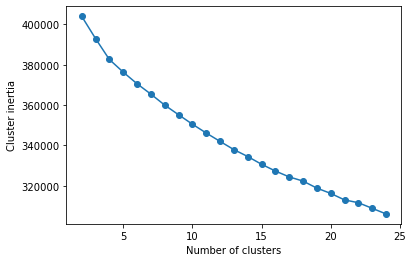

In [33]:
import numpy as np
from matplotlib import cm
import datetime
from sklearn.cluster import KMeans

inertia = []
clusterers  = []
cluster_labels = []

k_min = 2
k_max = 24
for k in range(k_min, k_max+1):
    now = datetime.datetime.now() + datetime.timedelta(hours=2)
    print(now.strftime("[%Y-%m-%d %H:%M:%S]"), "Computing k = %d" % k)
    clusterer = KMeans(n_clusters=k, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
    clusters.append(clusterer)
    
    clusterer.fit(data_norm)
    inertia.append(clusterer.inertia_)
    cluster_labels.append(clusterer.fit_predict(X))

plt.plot(range(k_min,k_max), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

We computed the next k values up to k=74 to try and see a nod in the graph. Unfortunately there was no node visible so no conclusions could yet be made.

In [52]:
import numpy as np
from matplotlib import cm
import datetime
from sklearn.cluster import KMeans

# inertia = []
# clusterers  = []
# cluster_labels = []

k_min = 25
k_max = 74
for k in range(k_min, k_max+1):
    now = datetime.datetime.now() + datetime.timedelta(hours=2)
    print(now.strftime("[%Y-%m-%d %H:%M:%S]"), "Computing k = %d" % k)
    clusterer = KMeans(n_clusters=k, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
    clusters.append(clusterer)
    
    clusterer.fit(data_norm)
    inertia.append(clusterer.inertia_)
    cluster_labels.append(clusterer.fit_predict(X))

[2020-04-20 22:24:05] Computing k = 25
[2020-04-20 22:35:03] Computing k = 26
[2020-04-20 22:45:34] Computing k = 27
[2020-04-20 22:54:33] Computing k = 28
[2020-04-20 23:04:43] Computing k = 29
[2020-04-20 23:15:16] Computing k = 30
[2020-04-20 23:26:30] Computing k = 31
[2020-04-20 23:37:04] Computing k = 32
[2020-04-20 23:48:08] Computing k = 33
[2020-04-20 23:58:14] Computing k = 34
[2020-04-21 00:09:15] Computing k = 35
[2020-04-21 00:20:58] Computing k = 36
[2020-04-21 00:33:18] Computing k = 37
[2020-04-21 00:45:05] Computing k = 38
[2020-04-21 00:56:26] Computing k = 39
[2020-04-21 01:09:14] Computing k = 40
[2020-04-21 01:21:08] Computing k = 41
[2020-04-21 01:33:24] Computing k = 42
[2020-04-21 01:46:26] Computing k = 43
[2020-04-21 01:59:33] Computing k = 44
[2020-04-21 02:11:43] Computing k = 45
[2020-04-21 02:28:03] Computing k = 46
[2020-04-21 02:42:28] Computing k = 47
[2020-04-21 02:57:11] Computing k = 48
[2020-04-21 03:11:47] Computing k = 49
[2020-04-21 03:26:01] Com

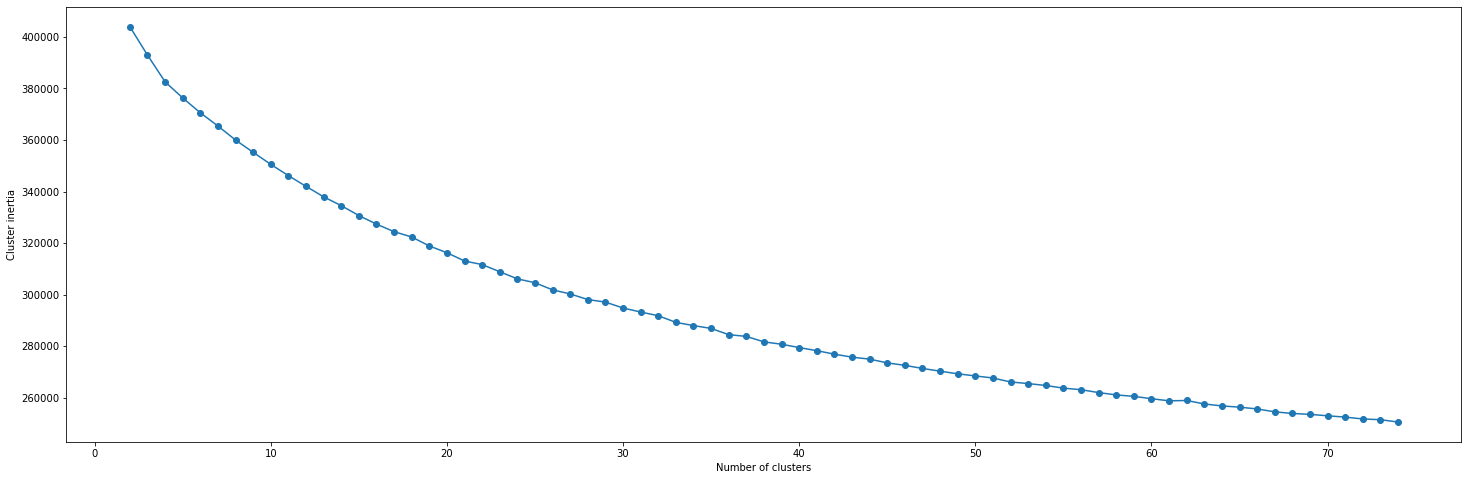

In [58]:
k_min = 2
k_max = 74

plt.figure(figsize=(25,8))
plt.plot(range(k_min,k_max+1), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

We have no indication of what would be a good clusetering base on the graph above. This doesn't necessarily mean that k-means failed to do good clustering. Another metric to see if a certain k value is good is by plotting the silhouette plot of a k value. The code below plots the silhouette and scatter plot of some k values that have been chosen at random.

The silhouette graph below for k=8 has one cluster, cluster 2, which is larger than average and has a silhouette value below average.
The silhouette graph below for k=20 has two clusters, clusters 6, 7 and 9, which are larger than average. Clusters 6 and 9 both have a silhouette value below average.

Both k values are not ideal for clustering. To find a better k value it would be an option to plot all graphs from k=8 up to some large k value. The problem with this is that this requires a lot of resources and computing time.

For n_clusters = 8 The average silhouette_score is : 0.04660935710512769


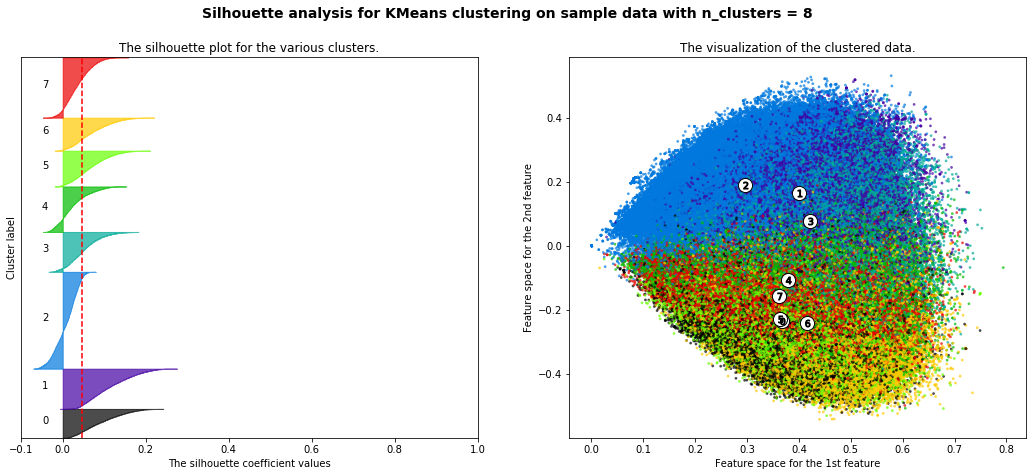

In [54]:
n_clusters = 8

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
model.fit(data_norm)
cluster_labels = model.fit_predict(data_norm)

plot_silhouette_graph_and_clusters(data_norm, n_clusters, model, cluster_labels)

For n_clusters = 12 The average silhouette_score is : 0.05874652828499087


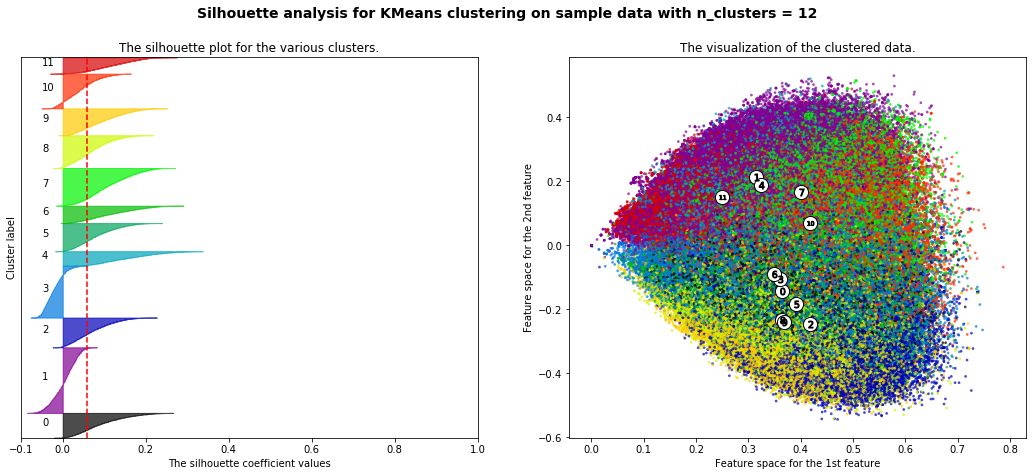

In [213]:
n_clusters = 12

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
model.fit(data_norm)
cluster_labels = model.fit_predict(data_norm)

plot_silhouette_graph_and_clusters(data_norm, n_clusters, model, cluster_labels)

For n_clusters = 13 The average silhouette_score is : 0.06612112211071204


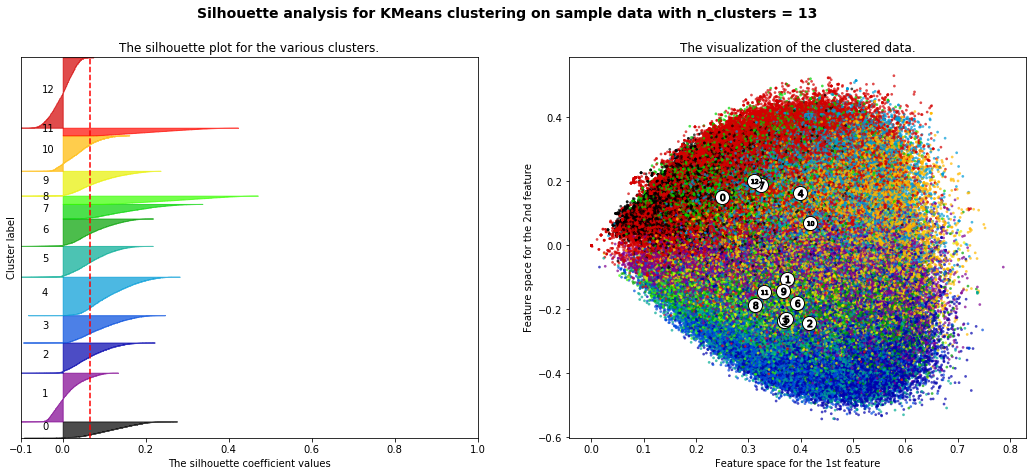

In [214]:
n_clusters = 13

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
model.fit(data_norm)
cluster_labels = model.fit_predict(data_norm)

plot_silhouette_graph_and_clusters(data_norm, n_clusters, model, cluster_labels)

For n_clusters = 14 The average silhouette_score is : 0.06658161768441832


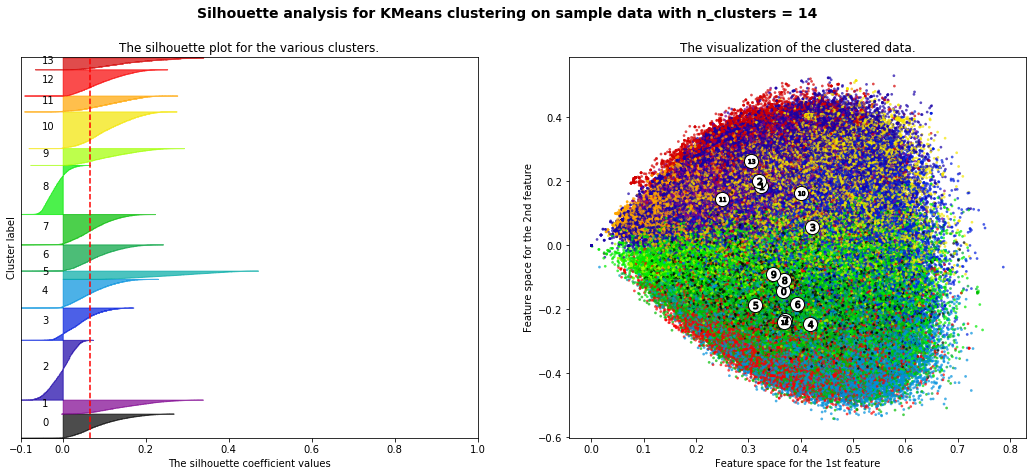

In [215]:
n_clusters = 14

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
model.fit(data_norm)
cluster_labels = model.fit_predict(data_norm)

plot_silhouette_graph_and_clusters(data_norm, n_clusters, model, cluster_labels)

For n_clusters = 15 The average silhouette_score is : 0.07020583341357974


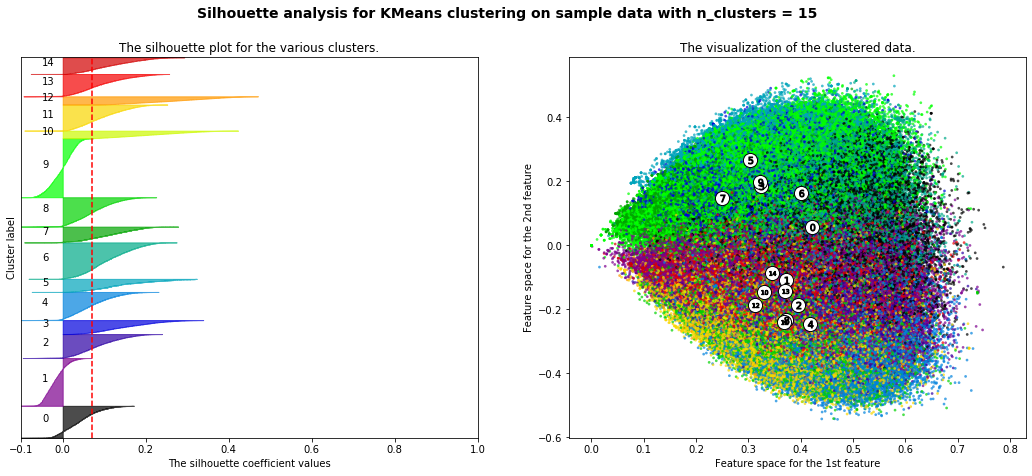

In [216]:
n_clusters = 15

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
model.fit(data_norm)
cluster_labels = model.fit_predict(data_norm)

plot_silhouette_graph_and_clusters(data_norm, n_clusters, model, cluster_labels)

For n_clusters = 20 The average silhouette_score is : 0.07340793412633945


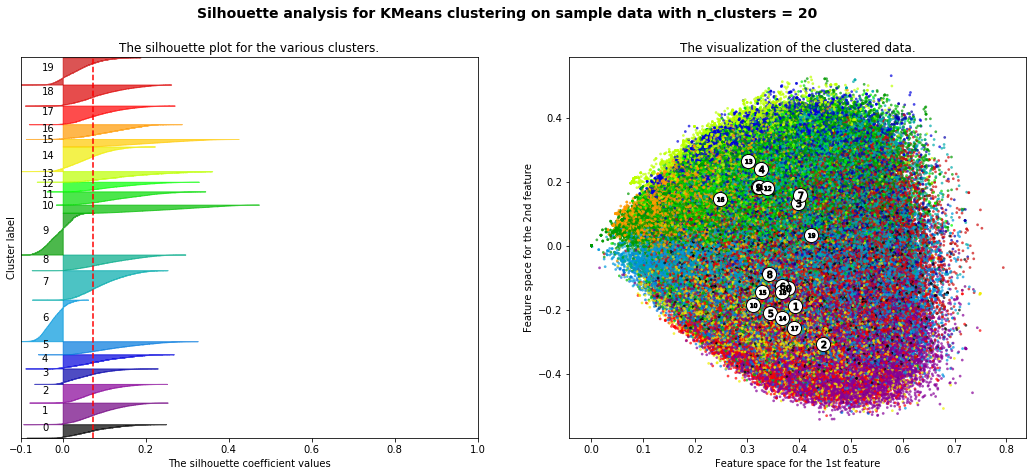

In [55]:
n_clusters = 20

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
model.fit(data_norm)
cluster_labels = model.fit_predict(data_norm)

plot_silhouette_graph_and_clusters(data_norm, n_clusters, model, cluster_labels)

The code below prints the top terms for clustering with k=8 and k=20.



In [207]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

k = 8
model = KMeans(n_clusters=k, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
model.fit(data_norm)

original_space_centroids = svd.inverse_transform(model.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]

terms = tf_idf_vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: card account bank loan balance equifax chase paid mortgage debt
Cluster 1: loan account payment payments loans mortgage navient paid late pay
Cluster 2: debt loan told phone called bank wells fargo check number
Cluster 3: payment mortgage paid late loan company wells fargo equifax payments
Cluster 4: report equifax account information reporting accounts inquiries removed dispute remove
Cluster 5: account card bank balance told payment late called did money
Cluster 6: payment loan payments information late received bank card days time
Cluster 7: debt collection company letter agency sent received loan owe validation


In [208]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=600, n_init=20, verbose=True, precompute_distances=True, n_jobs=-1)
model.fit(data_norm)

original_space_centroids = svd.inverse_transform(model.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]

terms = tf_idf_vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: payment information payments loan late received experian report mortgage days
Cluster 1: card account told balance called letter received said did sent
Cluster 2: check payment debt collection wells fargo told loan called sent
Cluster 3: equifax account inquiry information letter number identity breach company theft
Cluster 4: account payment late report card collection bank reporting debt balance
Cluster 5: card account bank loan balance paid mortgage debt equifax america
Cluster 6: report chase equifax reporting accounts number bank late removed paid
Cluster 7: loan account payment payments loans navient mortgage paid student pay
Cluster 8: card report accounts loans information navient student identity theft reporting
Cluster 9: debt collection agency company letter sent received paid loan owe
Cluster 10: report equifax information account reporting removed debt bankruptcy company dispute
Cluster 11: accounts mortgage information inquiries bank identity wells theft fargo 

### Hierarchical Clustering

Before making vectors of our documents with the Doc2Vec algorithm, the documents should be cleaned up. The cleaning up consists of:

1. Removing the stopwords
2. Tokenizing the document
3. Lemmatizing (breaking down a word to its dictionary form)

In [8]:
%%time

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
stop_words = set(stopwords.words('english'))
lemma=WordNetLemmatizer()
import re

def clean_col(col):
    cleaned_col = []
    for r in range(0,len(col)):
        row = str(col[r])
        row = re.sub('[^a-zA-Z]',' ', row)

        word_tokens = word_tokenize(row)
        
        row = []
        for w in word_tokens:
            if w not in stop_words:
                row.append(w)
        
        row = [lemma.lemmatize(w) for w in word_tokenize(str(row).lower())]
        row = ' '.join(row)
        cleaned_col.append(row)
    return cleaned_col

X = clean_col(cleaned_dataset['Consumer complaint narrative'])

CPU times: user 29min 57s, sys: 5.67 s, total: 30min 2s
Wall time: 30min 2s


A Doc2Vec model needs an input where all the different documents are tagged, for this the TaggedDocument class is used. This will make documents with each document containing a list of tokens and a tag (UUID) for each document.

In [9]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

Y = [[i] for i in range(len(X))]
documents = [TaggedDocument(X[i], Y[i]) for i in range(len(X))]

unable to import 'smart_open.gcs', disabling that module


To save up some memory only 50 vectors per document are allowed. This model will be trained for 30 epochs (cycles of a neural network).

For the model to train, it needs a vocabulary. The model will be explicitly trained on only the vocabulary coming from this dataset.

In [12]:
import gensim

model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=30)
model.build_vocab(documents)

When the model contains the vocabulary, it's time to train the model. The model acts like it has never seen the previous defined words before.

In [13]:
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

The code below is an example of a vectorized document.

In [14]:
vector = model.infer_vector(['I', 'would', 'like', 'to', 'get', 'a', 'mortage', 'for', 'a', 'house'])
vector

array([-0.02756566, -0.07044346, -0.00796168, -0.10599942, -0.01258381,
       -0.00989794, -0.13050658, -0.02367167,  0.08884442,  0.05744293,
        0.01288463,  0.10959988, -0.00593838,  0.02238233,  0.03475442,
        0.03614598, -0.07516517,  0.06106688, -0.02145474, -0.05076359,
       -0.03447027, -0.02630612, -0.01776799,  0.04742182, -0.03031526,
       -0.01873457,  0.03175047,  0.0192171 , -0.02020898, -0.08648773,
       -0.02706185, -0.11122252, -0.04202486, -0.0399985 , -0.0151442 ,
       -0.0299147 ,  0.04684012, -0.01821386, -0.0330929 ,  0.05161918,
        0.02076065,  0.03241419,  0.00410563,  0.00617904, -0.05892469,
        0.03566546, -0.02806515, -0.1006671 ,  0.03412325,  0.03015006],
      dtype=float32)

After training the model, it's time to convert the entire dataset to vectors. The vectorization is done by the 'model.infer_vector(tokens)' method.

In [15]:
vectorized_complaints = []
for x in X:
    vectorized_complaints.append(model.infer_vector(list(x)))
vectorized_complaints[0]

array([ 0.73506755,  0.31180084, -0.254573  , -0.13273594,  0.4759345 ,
        0.35589188,  0.21941376,  0.32736793, -0.09795112, -0.42815232,
        0.5511639 ,  0.16131282,  0.47748306,  0.13142042,  0.1869119 ,
        0.36236644, -0.3505522 , -0.06387183, -0.32092667, -0.2280637 ,
        0.08065651, -0.46613786, -0.26065627,  0.38043666, -0.47254506,
       -0.10256284, -0.32807127, -0.00859863, -0.6378769 ,  0.21838276,
        0.35834447, -0.20528205,  0.28017408, -0.2534962 ,  0.18289879,
        0.00992153, -0.48957798, -0.35999432, -0.2142903 ,  0.49322549,
       -0.6995687 ,  0.18959253, -0.25193763,  0.06170426, -0.39181286,
        0.36707926, -0.3194225 , -0.815311  , -0.07847967,  0.3569773 ],
      dtype=float32)

Because the dataset is large, a batch will be used for further research.

In [16]:
part = vectorized_complaints[:100000]

Before choosing the amount of clusters, guessing the distance between newly formed clusters or parameter tweeking, a dendrogram will be used to visualise the dataset.

For making a dendrogram, the Linkage Matrix is needed. A linkage matrix will calculate the hierarchical cluster tree. In statistics, linkage clustering is one of several methods of hierarchical clustering. It is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other.

The first linkage method we use is 'complete', with the metric 'cosine'

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(part, 'complete', 'cosine')

Below a visualisation is made of the hierarchical cluster tree.

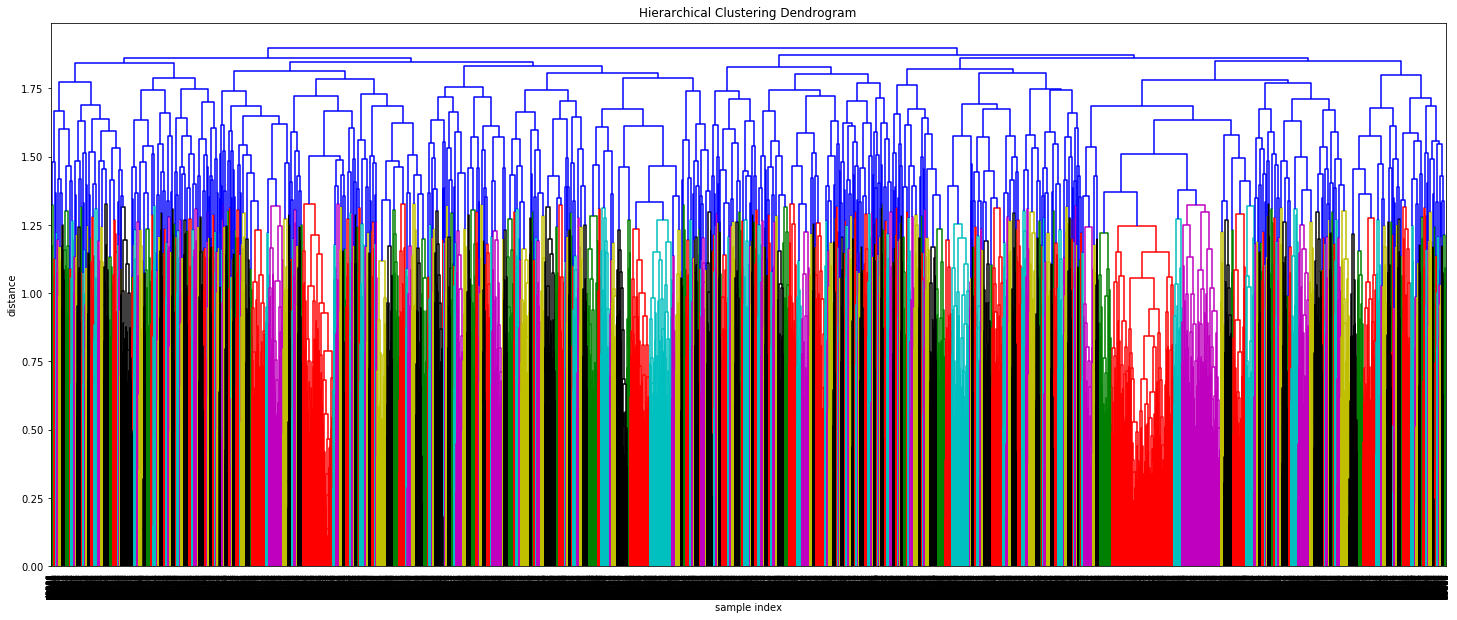

In [18]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., # rotates the x axis labels
    leaf_font_size=8., # font size for the x axis labels
)
plt.show()

As this is not very clear, the Dendrogram is cleaned up (truncated) in the next step.

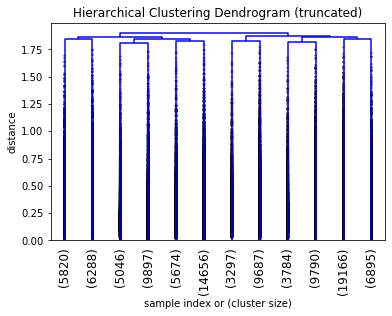

In [19]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', # show only the last p merged clusters
    p=12, # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, # to get a distribution impression in truncated branches
)
plt.show()

The key to interpreting a dendrogram is to focus on the height at which any two object (clusters) are joined together.

In the example above, it is clear that the clusters are divided quite evenly. The clusters merge at a distance of around 1,75.

It is important to know that the dendrogram is a summary of the distance matrix (linkage matrix) and some information hase gone lost. For this not to happen, the data needs to be ultrametric tree inequal, yet this is very unlikely to happen.

It is a wrong interpretation to assume that a dendrogram can tell the exact amount of clusters. The dendrogram is only good for getting to know the data and getting a general idea of the distribution. It does give a suggestion of the maximum distance between clusters.

After analyzing the data and getting to know the distribution of the clusters, it's time to make the clusters. The maximum distance is set to 1.60, as this will give a good estimation of the real clusters and the labels beloning to them.

The data is plotted over an x-range of 0 to 1.6.

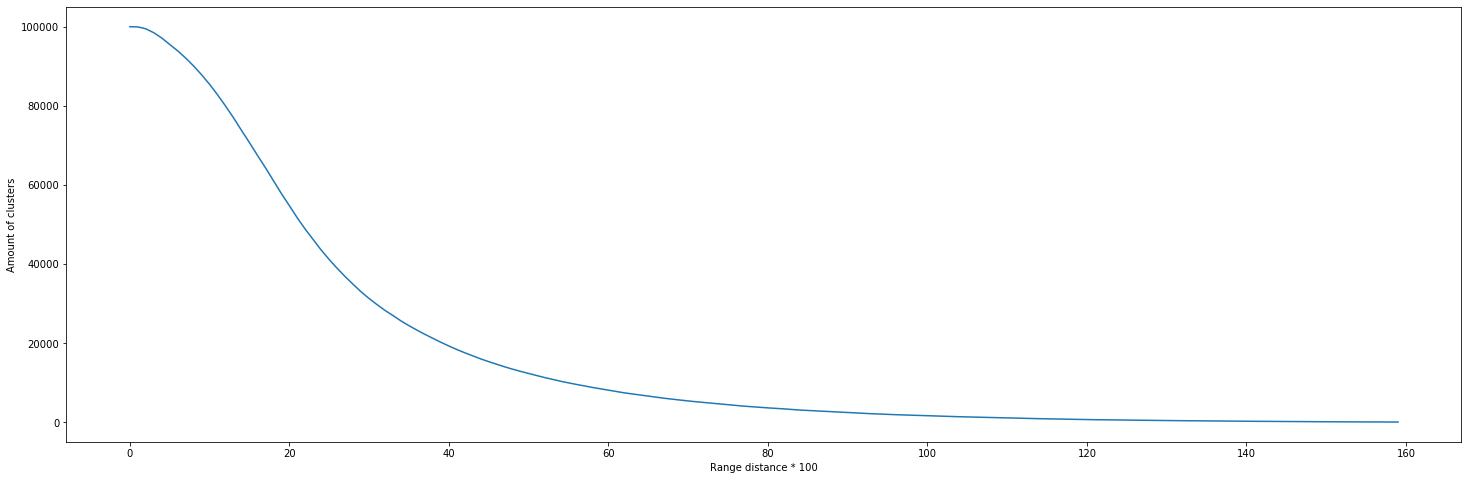

In [38]:
cluster_sizes = []
from scipy.cluster.hierarchy import fcluster

plt.figure(figsize=(25,8))

for x in range(160):
    max_d = 0.01 * x
    clusters = fcluster(Z, max_d, criterion='distance')
    cluster_sizes.append(len(set(clusters)))
plt.plot(cluster_sizes)
plt.xlabel("Range distance * 100")
plt.ylabel("Amount of clusters")
plt.show()

As seen above, there are no new real/clear insights. It will be beter to use a different linkage method.

The new linkage method is called 'Ward' and is better for taking outliers in account. Ward uses the metric 'euclidian'.

In [39]:
Z = linkage(part, 'ward')

The below code plots the new dendrograms with this new linkage method.

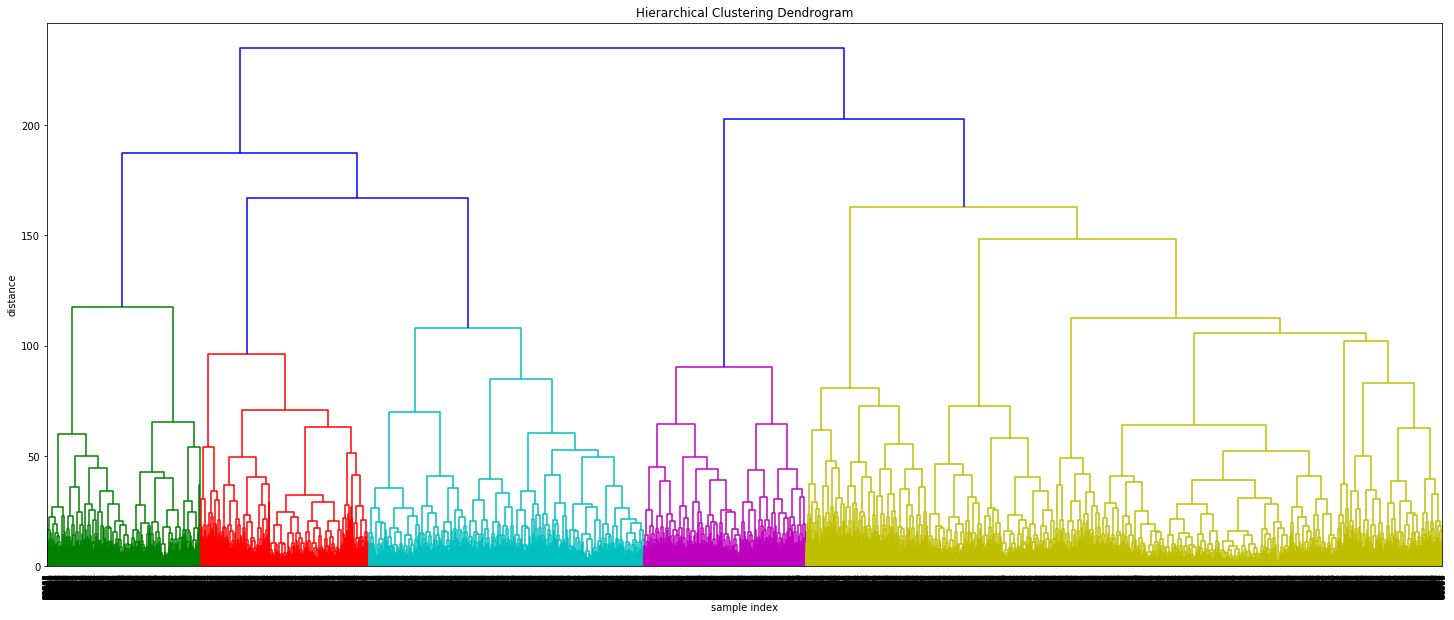

In [22]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., # rotates the x axis labels
    leaf_font_size=8., # font size for the x axis labels
)
plt.show()

Next, the dendrogram is truncated to give a clearer overview.

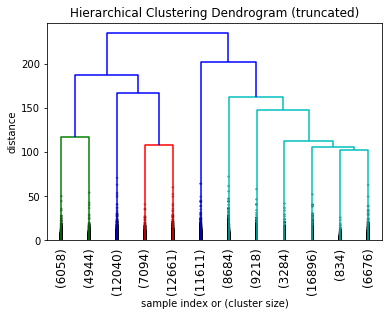

In [23]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp', # show only the last p merged clusters
    p=12, # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True, # to get a distribution impression in truncated branches
)
plt.show()

The range for the distance is now 0 to 160.

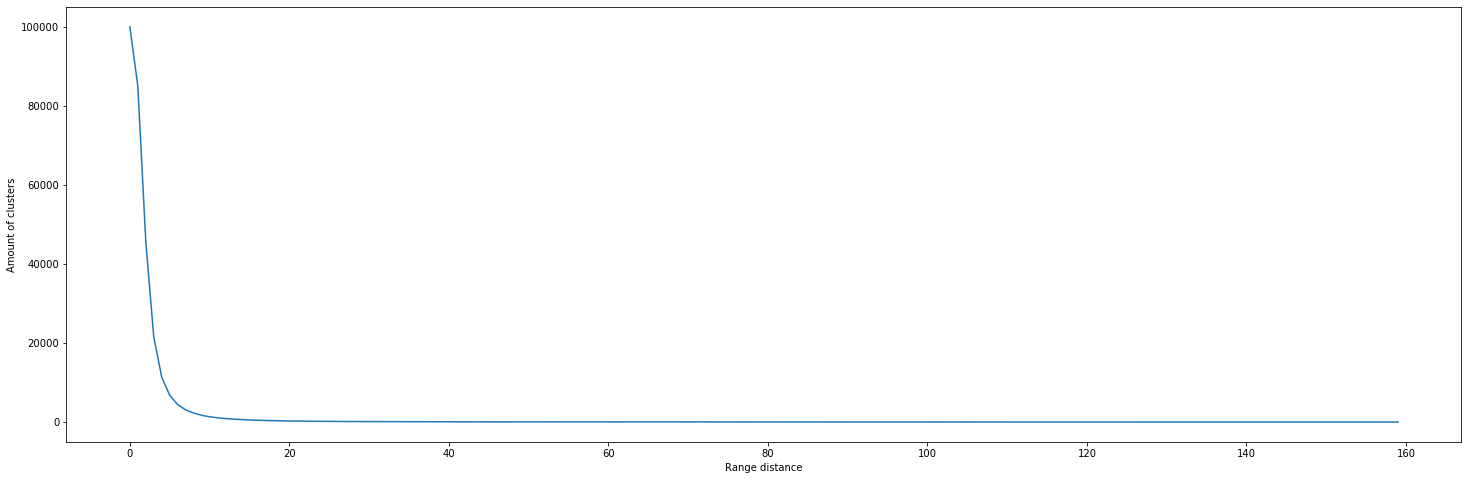

In [40]:
cluster_sizes = []
from scipy.cluster.hierarchy import fcluster

plt.figure(figsize=(25,8))

for x in range(0,160):
    max_d = x
    clusters = fcluster(Z, max_d, criterion='distance')
    cluster_sizes.append(len(set(clusters)))
plt.plot(cluster_sizes)
plt.xlabel("Range distance")
plt.ylabel("Amount of clusters")
plt.show()

As seen above, this gives a good result. There is a nod between the range of 0 to 80. Let's take a closer look.

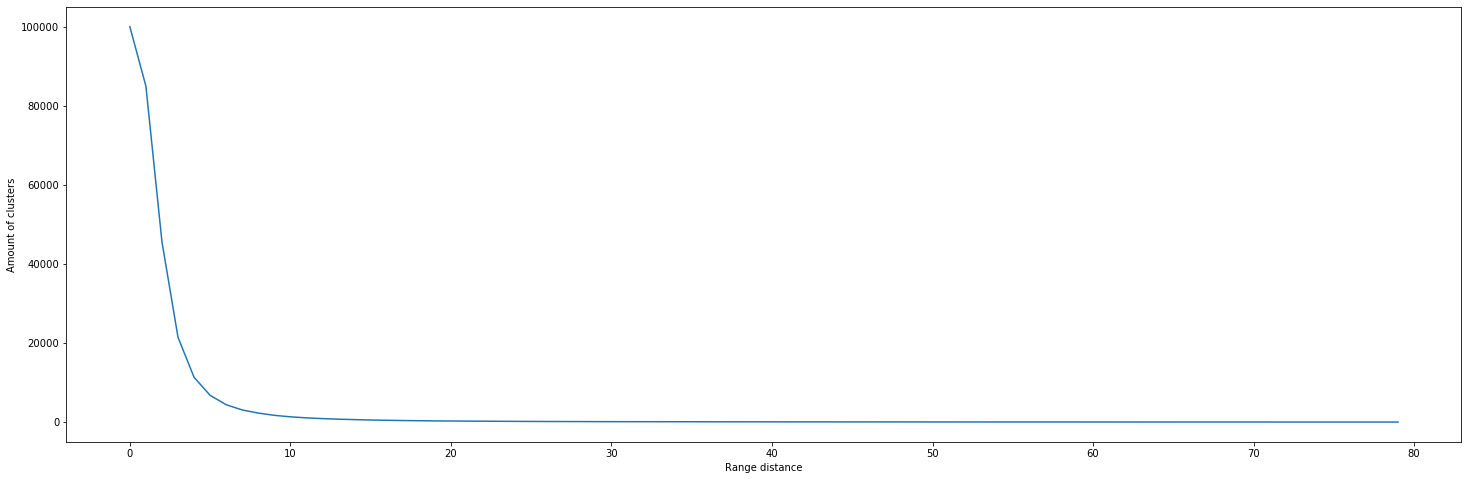

In [41]:
cluster_sizes = []
from scipy.cluster.hierarchy import fcluster

plt.figure(figsize=(25,8))

for x in range(0,80):
    max_d = x
    clusters = fcluster(Z, max_d, criterion='distance')
    cluster_sizes.append(len(set(clusters)))
plt.plot(cluster_sizes)
plt.xlabel("Range distance")
plt.ylabel("Amount of clusters")
plt.show()

A more in depth analysis shows that the nod starts at the distance of +/- 12. This distance will be used for clustering. Also concidering the amount of clusteres because too many clusters are also useless in real world applications.

In [42]:
cluster_sizes[30]

111

In [43]:
cluster_sizes[40]

66

In [44]:
cluster_sizes[50]

38

In [45]:
cluster_sizes[60]

30

In [48]:
cluster_sizes[65]

22

By using distance 30, there are 111 clusters.

In [49]:
cluster = fcluster(Z, 50, criterion="distance")
cluster

array([32,  4, 10, ..., 10, 10, 34], dtype=int32)

In [50]:
result_product = []
result_issue = []

for r in range(len(set(cluster)) + 1):
    result_product.append([])
    result_issue.append([])
    
for i in range(len(cluster)):
    result_product[cluster[i]].append(cleaned_dataset['Product'][i])
    result_issue[cluster[i]].append(cleaned_dataset['Issue'][i])

In [51]:
import operator
import itertools

products = []
for product in set(cleaned_dataset['Product']):
    products.append(product)
    
for i in range(1, len(result_product)):
    print("Cluster",i)
    top_3 = {}
    for j in products:
        top_3[j] = result_product[i].count(j)
    top_3 = dict(sorted(top_3.items(), key=operator.itemgetter(1),reverse=True))
    top_3 = dict(itertools.islice(top_3.items(), 3))
    for key, value in top_3.items():
        print("\t\t",value, "=>", key)

Cluster 1
		 281 => Credit reporting, credit repair services, or other personal consumer reports
		 211 => Debt collection
		 151 => Mortgage
Cluster 2
		 357 => Mortgage
		 168 => Debt collection
		 151 => Student loan
Cluster 3
		 688 => Debt collection
		 508 => Credit reporting, credit repair services, or other personal consumer reports
		 382 => Bank account or service
Cluster 4
		 1951 => Credit reporting, credit repair services, or other personal consumer reports
		 419 => Credit reporting
		 400 => Debt collection
Cluster 5
		 845 => Credit reporting, credit repair services, or other personal consumer reports
		 223 => Credit reporting
		 43 => Credit card
Cluster 6
		 93 => Credit reporting, credit repair services, or other personal consumer reports
		 10 => Credit reporting
		 2 => Mortgage
Cluster 7
		 314 => Debt collection
		 86 => Credit reporting, credit repair services, or other personal consumer reports
		 41 => Credit reporting
Cluster 8
		 426 => Credit reporting, cr

#### Conclusion

The final results show that the 'ward' linkage method gives a better clustering result. To visualize these results, previously defined product labels as given in the original dataset are reused and combined with our new results.

As seen above, some labels occur in more than one cluster (for example: Credit reporting, credit repair services or other personal consumer reports). One reason for this is that the product labels are not correct. Another reason for this is that categories like "Credit reporting, credit repair services or other personal consumer reports" are strongly present in the dataset which makes us believe that certain categories consist of multiple smaller categories therefor this proves that our previously made assumption about the labels is correct.

It is also visible in these top-3 results that there is no sign of the virtual currency product label. This could mean that this smal group of complaints about virtual currency could be outliers compared to the whole dataset. This means that there would be no need for a seperate cluster for complaints about virtual currency.

Clusters 37 and 38 have the same top-3 result which implies that certain product labels may have a common parent cluser.

This analysis is done on products merely to make a comparison in terms of clusters and is not meant for labeling these new clusters.

### Topic extraction with Latent Dirichlet Allocation (LDA)

Latent Dirichlet Allocation is a generative probabilistic model commonly used in NLP. It is also a topic model that is used for discovering abstract topics from a collection of documents. Here it is used to extract topics from consumer complaints. There are two purposes of using LDA in this context. The first purpose is to cluster the complaints, these clusters are called topics. The second purpose is to use one or more terms/words per cluster that are extracted from these topics as labels for these clusters. If these terms/words seem to be representative for the cluster then it could be useful to have these terms as human-readable labels for the clusters instead of having just clusters each a number.

In [128]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import string
punctuations = string.punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english')) 
lemma=WordNetLemmatizer()

def cleanup_text(complaint):
    doc = nlp(complaint, disable=['parser', 'ner'])
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
    tokens = [tok for tok in tokens if tok not in stop_words and tok not in punctuations and re.match('[a-zA-Z]', tok)]
    return tokens

In [135]:
doc_sample = cleaned_dataset['Consumer complaint narrative']
processed_docs = doc_sample.map(cleanup_text)

The following is an example of LDA with 10 topics.

In [136]:
import gensim

dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.042*"account" + 0.024*"report" + 0.023*"payment" + 0.015*"loan" + 0.011*"pay" + 0.008*"make" + 0.007*"debt" + 0.007*"date" + 0.007*"amount" + 0.006*"information"
Topic: 1 
Words: 0.025*"debt" + 0.025*"report" + 0.017*"loan" + 0.016*"pay" + 0.011*"payment" + 0.010*"call" + 0.010*"company" + 0.009*"account" + 0.009*"time" + 0.009*"collection"
Topic: 2 
Words: 0.014*"account" + 0.014*"pay" + 0.012*"payment" + 0.011*"receive" + 0.010*"loan" + 0.010*"time" + 0.010*"month" + 0.010*"balance" + 0.009*"date" + 0.009*"mortgage"
Topic: 3 
Words: 0.040*"payment" + 0.027*"account" + 0.015*"make" + 0.014*"card" + 0.014*"fee" + 0.014*"bank" + 0.014*"pay" + 0.014*"charge" + 0.011*"late" + 0.010*"call"
Topic: 4 
Words: 0.025*"call" + 0.024*"account" + 0.017*"report" + 0.011*"tell" + 0.011*"would" + 0.011*"send" + 0.009*"payment" + 0.009*"say" + 0.009*"information" + 0.009*"letter"
Topic: 5 
Words: 0.021*"account" + 0.019*"report" + 0.017*"information" + 0.014*"debt" + 0.011*"consumer

In [137]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

vis_data = gensimvis.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

The following is an example of LDA with 38 topics.

In [138]:
import gensim

dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=38, id2word=dictionary, passes=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.025*"account" + 0.022*"check" + 0.020*"bank" + 0.018*"tell" + 0.018*"call" + 0.014*"would" + 0.014*"money" + 0.013*"say" + 0.010*"go" + 0.010*"deposit"
Topic: 1 
Words: 0.017*"would" + 0.014*"make" + 0.013*"payment" + 0.010*"get" + 0.010*"company" + 0.010*"request" + 0.010*"send" + 0.009*"account" + 0.009*"report" + 0.009*"call"
Topic: 2 
Words: 0.057*"consumer" + 0.038*"information" + 0.022*"block" + 0.022*"agency" + 0.021*"report" + 0.018*"identity" + 0.017*"theft" + 0.015*"section" + 0.011*"reporting" + 0.011*"file"
Topic: 3 
Words: 0.023*"request" + 0.013*"call" + 0.013*"receive" + 0.012*"send" + 0.011*"bank" + 0.010*"submit" + 0.009*"payment" + 0.009*"pay" + 0.009*"information" + 0.008*"account"
Topic: 4 
Words: 0.062*"inquiry" + 0.035*"report" + 0.019*"remove" + 0.014*"call" + 0.013*"hard" + 0.012*"address" + 0.010*"authorize" + 0.010*"company" + 0.009*"time" + 0.009*"would"
Topic: 5 
Words: 0.042*"debt" + 0.013*"provide" + 0.012*"state" + 0.012*"request" + 0.0

In [139]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

vis_data = gensimvis.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis_data)

LDA seems to be reasonably good at clustering and extracting topics. As displayed above, these words/terms have a weight assigned to it, this is a measure of how strong a term is present in that cluster.

LDA does a good job of extracting good terms but there is still a supervised part to it if we want these terms to be used as real labels for the generated clusters. An example of this is cluster 1 of 38 clusters (in the interactive graph), this cluster has the following terms; mortgage, appraisal, loan, home, modification, payment, property, foreclosure, etc. These terms are closely related and could be used to decide to label this cluster as "Mortgage loan" or something similar. Some other examples are; cluster 9 which could be labeled "Debt collection", cluster 13 (lambda set to 0.4) has the terms; car, dealership, loan, vehicle, payment, lease, etc, this could be labeled as "Car loan/lease". For some clusters, it's not possible to give a label based on just this analysis, for these clusters a further analysis of the complaints is necessary. Another option is to run LDA again with another amount of topics/clusters until most of the clusters have a clear label base on the extracted terms.

### Outlier detection

Outlier detection is an interesting part of data analysis because it can benefit the end result. As an example outliers can be removed before training a model for predictions to have a better model with a higher accuracy.

DBScan is used in the code bellow to do outlier detection. DBScan is good for clustering but that's not our interest at the moment. DBScan labels all datapoints and it gives a label "-1" to outliers which is perfect for the purpose of outlier detection.

[0 0 0 ... 0 0 0]
Counter({0: 99922, -1: 67, 1: 11})


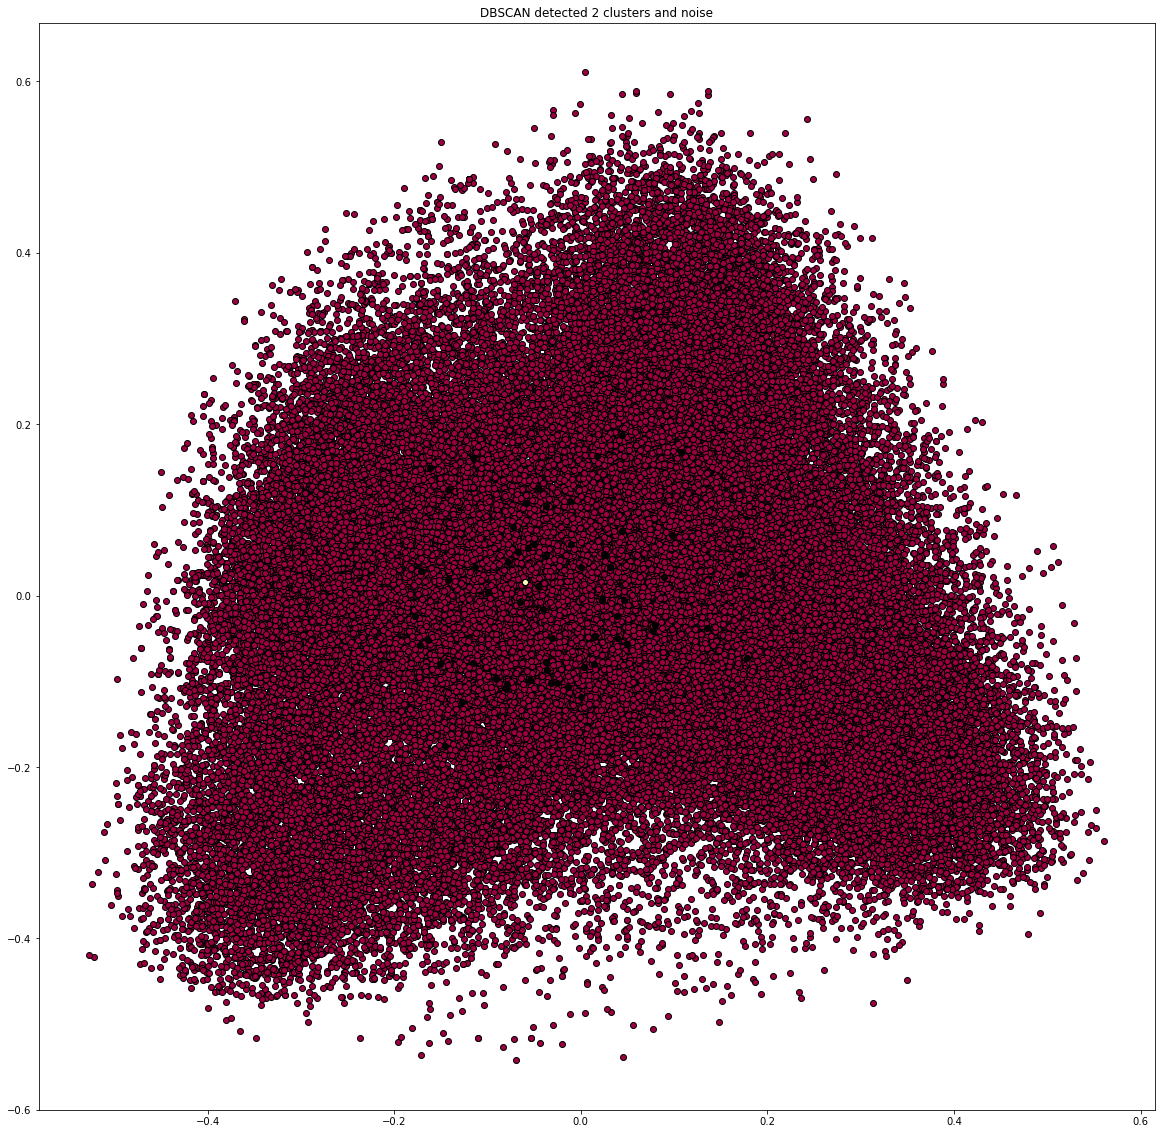

In [197]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer, normalize
from sklearn.pipeline import make_pipeline
from pylab import rcParams

rcParams['figure.figsize'] = 20,20

data = cleaned_dataset['Consumer complaint narrative'][:100000].to_list()

tf_idf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
tf_idf = tf_idf_vectorizer.fit_transform(data)

svd = TruncatedSVD(n_components=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_lsa = lsa.fit_transform(tf_idf)

dbscan = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1)
dbscan.fit(X_lsa)

print(dbscan.labels_)
print(Counter(dbscan.labels_))
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

pca = PCA(n_components=n_clusters_).fit(X_lsa)
pca_2d = pca.transform(X_lsa)

unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # this makes all outliers appear black
#     else:
#         col = [0, 1, 0, 1] # this makes all clusters appear green

    class_member_mask = (dbscan.labels_ == k)
    
    xy = pca_2d[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k',markersize=6)
    
    xy = pca_2d[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k',markersize=6)

plt.title('DBSCAN detected ' + str(n_clusters_) + ' clusters and noise')
plt.show()

Again, we do not care about the detected clusters, we care about the detected outliers, which we will be fetching in the code below.

In [200]:
outlier_ids = []

for id in range(0, len(dbscan.labels_)):
    if dbscan.labels_[id] == -1:
        outlier_ids.append(id)

The following code prints all ids of the outliers detected by DBScan.

In [201]:
print('DBSCAN detected ' + str(len(outlier_ids)) + ' outliers')
print(outlier_ids)

DBSCAN detected 67 outliers
[140, 2913, 3787, 9335, 10877, 11101, 11238, 16355, 21183, 24124, 24328, 24394, 25515, 25996, 27656, 28773, 33025, 35655, 36454, 39392, 43034, 44300, 44858, 45496, 45847, 46011, 46550, 47326, 47910, 48089, 48701, 49337, 49508, 55070, 56774, 57073, 62097, 62757, 63916, 65235, 66507, 67874, 68413, 70632, 72093, 74540, 74965, 75002, 75936, 76522, 79987, 80213, 84069, 84805, 85730, 89276, 89514, 90407, 90859, 91342, 94225, 98253, 98718, 98949, 99030, 99713, 99991]


The following are some example complaints that are labeled as outliers.

In [202]:
print(data[140])

I got a reply and my phone is not working. I tried to call but it is shutting down. You are asking for more info but the person I talked to said he needed the reporting agency I reported it to. That do n't make any sense to me as you have it on your own paper work. What is it you need or require to move forward with this complaint? I am telling you I am requesting each item you say I bought with this credit card? that you have itemized without the full date and my signature on each receipt that I actually bought the item. I do n't want any phone contact. I want proof that you ask me questions and I respond. This has been going on long enough now and needs to end. I also want to be assured the eliminated debt that was to be removed from reporting will not be resold and start this over again.


In [203]:
print(data[2913])

    Loan  Currently closed was forgiven by  in response to the Government lawsuit investigation regarding Financial Fraud during the // Housing crisis. I would like it cleared from my credit report since it improperly reports as a foreclosure. I am including the forgiveness letter that I received in //.


In [204]:
print(data[3787])

This is a rebuttal - see enclosures


In [205]:
print(data[9335])

Already filed Disputes letters also  sent an letter saying that they investigate and deleted or removed some errors this    last update was  2016 I have been trying to get help with credit problems for more than four years now the Fair credit Act as a consumer should help in this case. if any questions please call me at my home phone number (  )  or (  ) 


In [206]:
print(data[10877])

I stop attending classes because I had personal issues during the year//,  since then I stopped assisting to my classes, and they continued to charge me until now the date //. I only finished 21 credits which is in my opinion a theft and a dishonest way of handling a student support in financial and personal matters.


These are clearly outliers since they are short complaints and also don't have much substance or key terms as seen in other complaints. Therefore these complaints can be classified as outliers and could be removed when doing further classification.

## Member workload

| Name | Subject | Date |
| :--- | :--- | :--- |
| Gillis Werrebrouck | Initial project setup including setting up the initial notebook, splitting up the dataset and reading all part files into one pandas dataframe. | March 1, 2020 |
| All | Video call to discuss the approach and divison of tasks. | March 12, 2020 |
| Gillis Werrebrouck | Exploratory data analysis. | March 12, 2020 |
| Robin De Zwaef | Started with data cleaning, reading up on best practices to clean textual data. | March 14, 2020 |
| Christophe Beke | Started with the analysis and research: EDA, Supervised, Unsupervised. | March 16, 2020 |
| Gillis Werrebrouck | Revision and cleaning up current state of the notebook. | March 17, 2020 |
| All | Video call to discuss the classifiers that will be implemented. | March 19, 2020 |
| Gillis Werrebrouck | Data cleaning. | March 19, 2020 |
| Christophe Beke | Pre-processing + indexing + implementation Random Forest. | March 20, 2020 |
| Christophe Beke | Hyperparametertuning + conclusions Random Forest. | March 18, 2020 |
| Robin De Zwaef | Started implementing SVM & data cleaning. | March 21, 2020 |
| Robin De Zwaef | Finished implementing SVM & data cleaning. | March 22, 2020 |
| All | Video call to discuss the implemented classifiers and formulate conclusions. | March 24, 2020 |
| Gillis Werrebrouck | Merge all supervised classifiers into one notebook and revision and cleaning up. | March 25, 2020 |
| Gillis Werrebrouck | Revision sprint 1 - data cleanup (remove certain things from narative) + use one-hot-encoding instead of factorization). | April 7, 2020 |
| Christophe Beke | Analysis of unsupervised algorithms. | April 9, 2020 |
| Robin De Zwaef + Christophe Beke | Revision of conclusion. | April 10, 2020 |
| All | Meeting and revision + unsupervised research. | April 10, 2020 |
| Robin De Zwaef | Reasearch KMeans clustering implementations. | April 11, 2020 |
| Gillis Werrebrouck | Research neural networks. | April 11, 2020 |
| Gillis Werrebrouck | Implementing a RNN. | April 13, 2020 |
| Gillis Werrebrouck | Implementing a RNN. | April 14, 2020 |
| Robin De Zwaef | Start implementing KMeans clustering. | April 14, 2020 |
| All | Meeting about unsupervised clustering. | April 15, 2020 |
| Robin De Zwaef | Finish KMeans clustering implementation. | April 15, 2020 |
| Gillis Werrebrouck | Refine KMeans clustering. | April 15, 2020 |
| Christophe Beke | Tokenizing & Lemmatizing the dataset with NLTK. | April 16, 2020 |
| Robin De Zwaef | Calculate inertia with KMeans and various cluster counts. | April 17, 2020 |
| Christophe Beke | Doc2Vec implementation. | April 17, 2020 |
| Robin De Zwaef | Calculate silhouette plots with KMeans and various cluster counts. | April 18, 2020 |
| Christophe Beke | Dendrogram implementation. | April 18, 2020 |
| All | Meeting about unsupervised clustering. | April 19, 2020 |
| Gillis Werrebrouck | Calculate silhouette plots with KMeans and various cluster counts. | April 19, 2020 |
| Christophe Beke | FCluster of SciPy library implementation. | April 20, 2020 |
| All | Meeting about unsupervised clustering. | April 21, 2020 |
| Robin De Zwaef | Unsupervised outlier detection. | April 21, 2020 |
| Gillis Werrebrouck | Finish KMeans clustering | April 21, 2020 |
| Gillis Werrebrouck | Research LDA for clustering and topic extraction | April 21, 2020 |
| Robin De Zwaef | Unsupervised outlier detection. | April 22, 2020 |
| Christophe Beke | Conclusion and comment with code. | April 22, 2020 |
| Gillis Werrebrouck | Implement LDA for clustering and topic extraction | April 22, 2020 |
| Gillis Werrebrouck | Revision and cleaning up of notebook. | April 22, 2020 |